In [1]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from sage.visualization.vistool_pipeline import VisTool
from sage.visualization.visual_utils import plot_vismap, Assembled

This run_pretrains_single function is no longer supported since version=0.2
This run_dataloader function is no longer supported since version=0.2
This run_pretrains_dataloader function is no longer supported since version=0.2


In [2]:
from sage.config import load_config
from sage.training.trainer import MRITrainer

cfg = load_config()
cfg.batch_size = 1
# cfg.partial = .05

cfg.encoder = {
    'name': 'resnet',
    'config': {
        'start_channels': 16
    }
}
trainer = MRITrainer(cfg)

Use cuda:0 as a device.
Output from encoder is 128.
Total Number of parameters: 912053
TOTAL TRAIN 1161 | VALID 291
MIXED PRECISION:: True


In [3]:
encoder = trainer.models['encoder']
regressor = trainer.models['regressor']
del trainer

import torch
torch.cuda.empty_cache()

In [4]:
model = Assembled(encoder, regressor)

PREFIX = 'G:/My Drive/brain_data/workspace/result/models/20210831-1348_resnet'
SUFFIX = 'ep049_mae8.39.pt'

weight = {
    'encoder': f"{PREFIX}/encoder/{SUFFIX}",
    'regressor': f"{PREFIX}/regressor/{SUFFIX}",
    'config': f"{PREFIX}/config.yml"
}

In [5]:
gcam = VisTool(cfg, model, cam_type='gcam')

In [6]:
from sage.data.dataloader import get_dataloader

train_dataloader = get_dataloader(cfg, test=False)
valid_dataloader = get_dataloader(cfg, test=True)

batch = next(iter(train_dataloader))
x, y, _ = batch

# vismap = gcam(x, y, weight=weight, visualize=True)

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 0.804
[true] 51 [pred] 1.075
[true] 66 [pred] 0.771
[true] 84 [pred] 1.702
[true] 72 [pred] 1.042
[true] 83 [pred] 0.675
[true] 53 [pred] 1.107
[true] 31 [pred] 0.750
[true] 70 [pred] 1.038
[true] 73 [pred] 1.412
[true] 23 [pred] 0.425
[true] 71 [pred] 0.619
[true] 81 [pred] 1.972
[true] 65 [pred] 1.167
[true] 71 [pred] 1.057
[true] 80 [pred] 1.765
[true] 22 [pred] 0.657
[true] 27 [pred] 0.688
[true] 65 [pred] 0.866
[true] 56 [pred] 1.039
[true] 58 [pred] 1.193
[true] 50 [pred] 1.242
[true] 61 [pred] 0.962
[true] 73 [pred] 0.465
[true] 53 [pred] 1.395
[true] 26 [pred] 0.637
[true] 69 [pred] 0.931
[true] 76 [pred] 1.350
[true] 67 [pred] 1.245
[true] 34 [pred] 1.278
[true] 75 [pred] 0.491
[true] 21 [pred] 0.657
[true] 75 [pred] 1.773
[true] 70 [pred] 1.384
[true] 46 [pred] 0.729
[true] 23 [pred] 1.085
[true] 72 [pred] 1.020
[true] 48 [pred] 0.605
[true] 68 [pred] 1.202
[true] 34 [pred] 1.272
[true] 47 [pred] 0.892

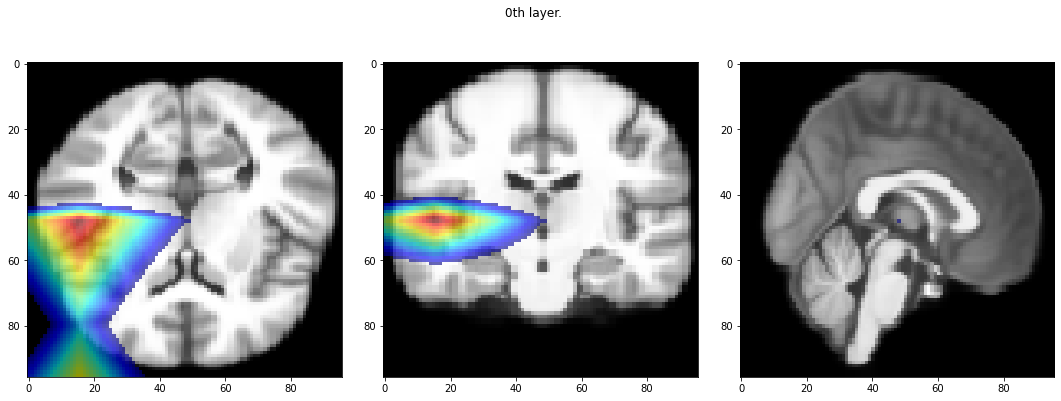

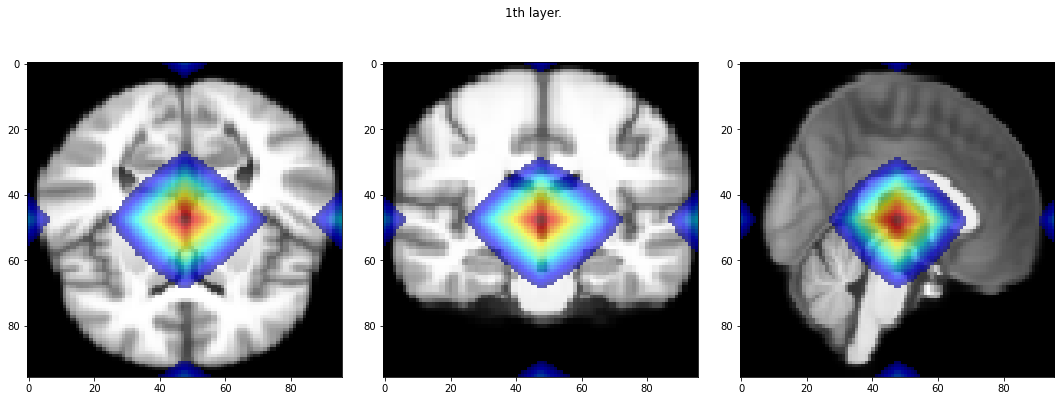

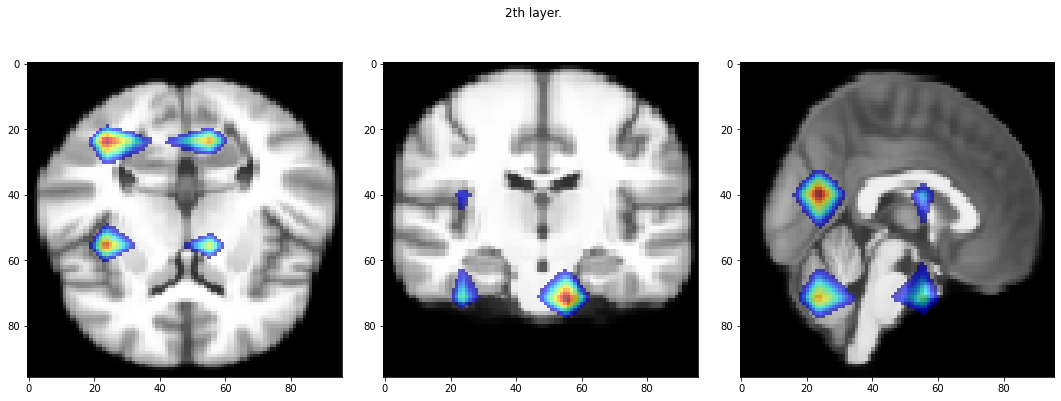

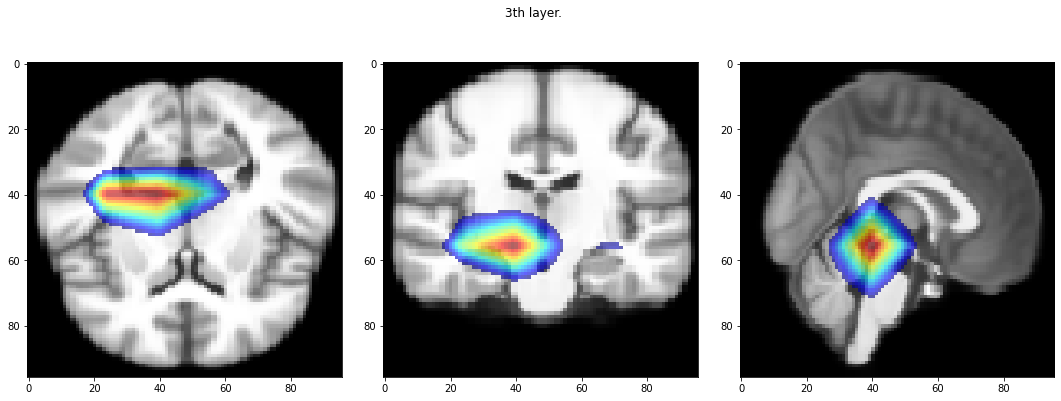

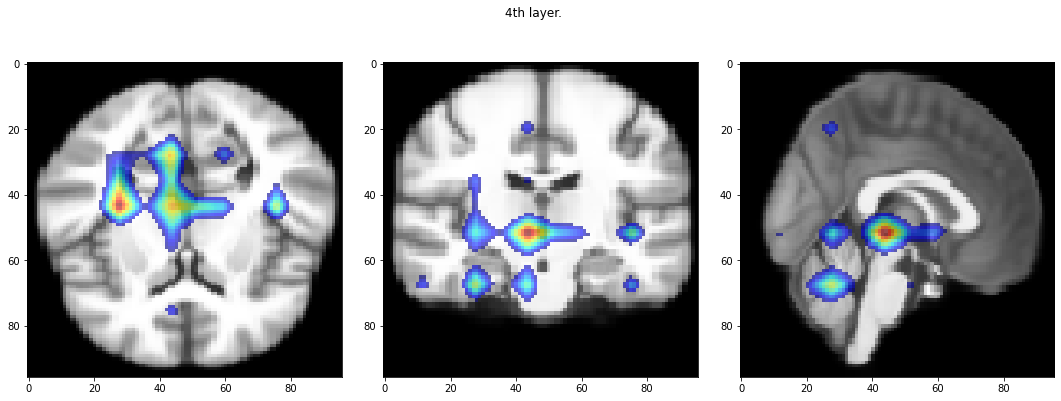

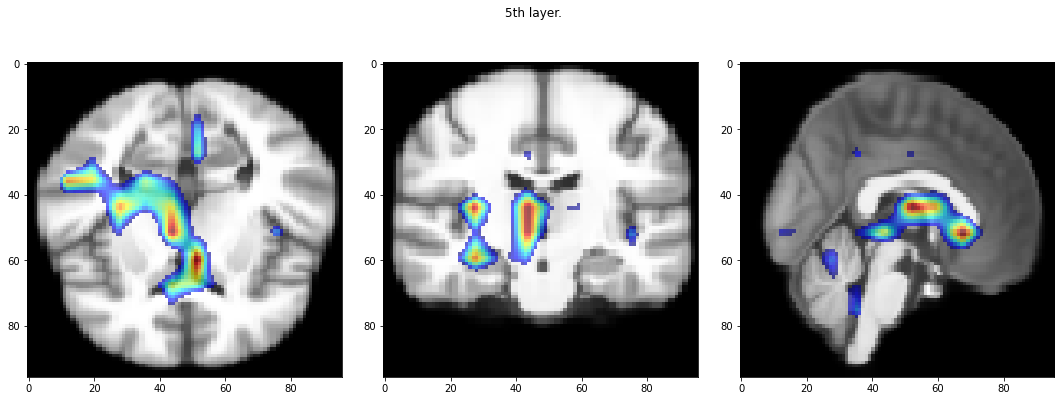

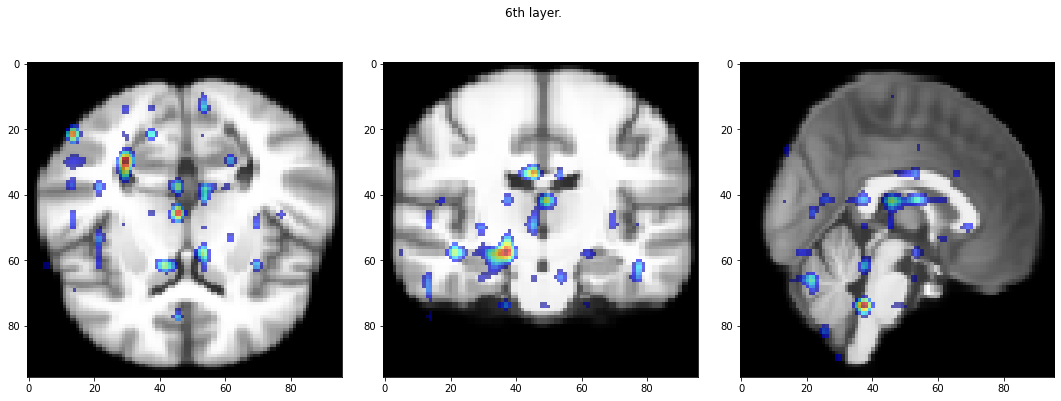

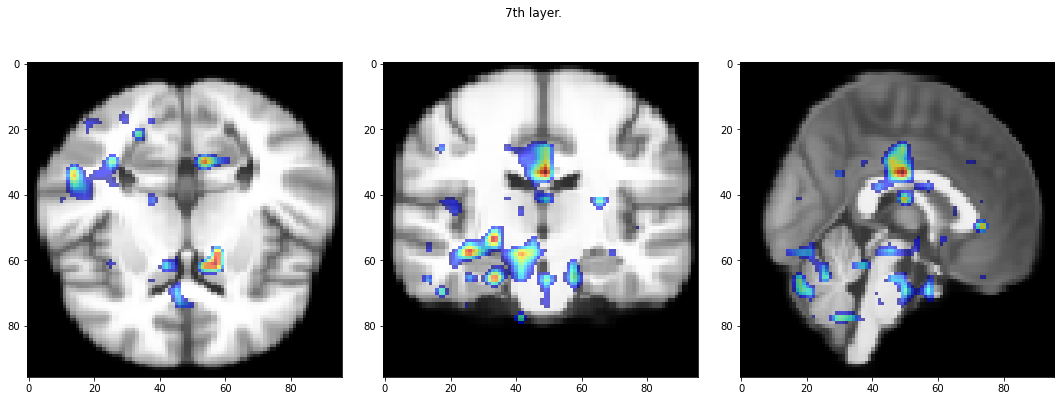

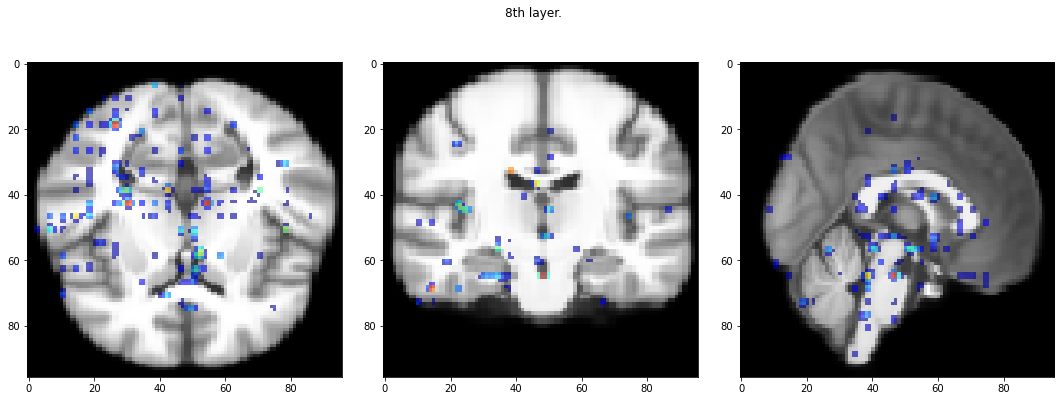

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 2.954
[true] 51 [pred] 2.009
[true] 66 [pred] 2.060
[true] 84 [pred] 2.905
[true] 72 [pred] 1.843
[true] 83 [pred] 1.815
[true] 53 [pred] 2.103
[true] 31 [pred] 1.656
[true] 70 [pred] 2.397
[true] 73 [pred] 1.917
[true] 23 [pred] 1.958
[true] 71 [pred] 1.362
[true] 81 [pred] 3.134
[true] 65 [pred] 1.920
[true] 71 [pred] 2.501
[true] 80 [pred] 2.853
[true] 22 [pred] 1.683
[true] 27 [pred] 1.602
[true] 65 [pred] 1.754
[true] 56 [pred] 2.509
[true] 58 [pred] 1.906
[true] 50 [pred] 1.714
[true] 61 [pred] 1.372
[true] 73 [pred] 2.150
[true] 53 [pred] 2.603
[true] 26 [pred] 1.761
[true] 69 [pred] 3.007
[true] 76 [pred] 1.950
[true] 67 [pred] 2.146
[true] 34 [pred] 1.570
[true] 75 [pred] 1.965
[true] 21 [pred] 1.688
[true] 75 [pred] 3.585
[true] 70 [pred] 3.306
[true] 46 [pred] 1.241
[true] 23 [pred] 1.711
[true] 72 [pred] 2.906
[true] 48 [pred] 1.786
[true] 68 [pred] 2.246
[true] 34 [pred] 1.623
[true] 47 [pred] 1.482

C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


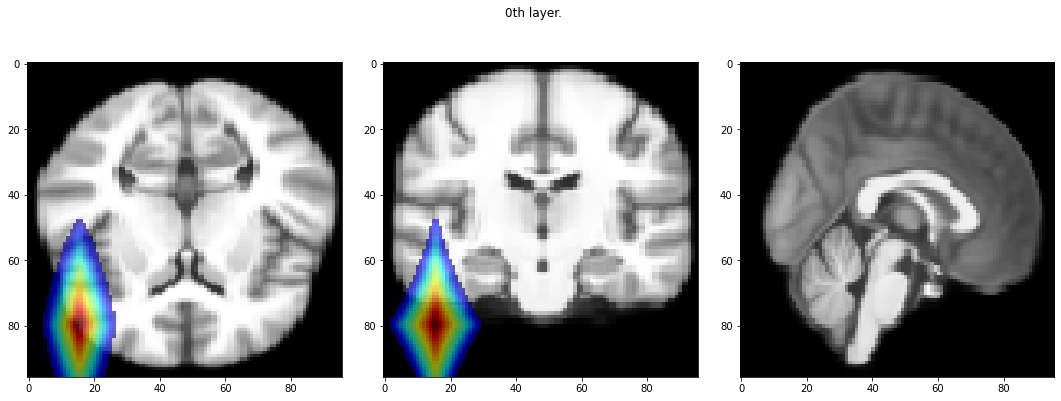

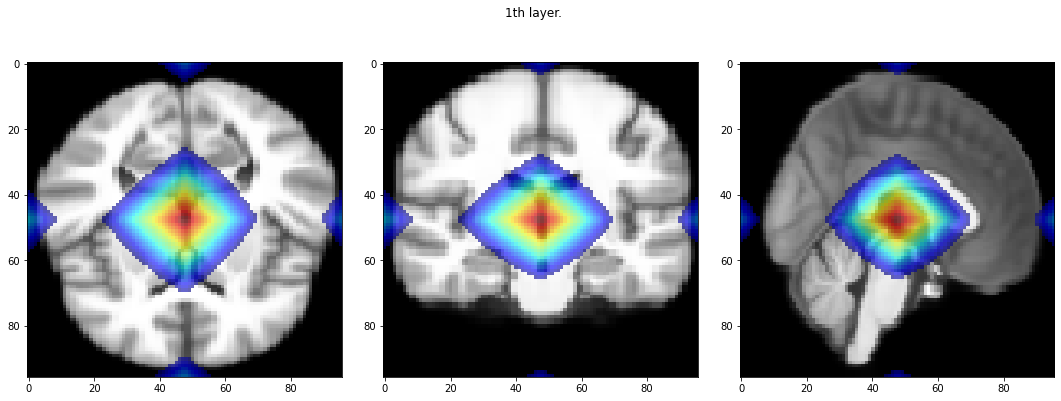

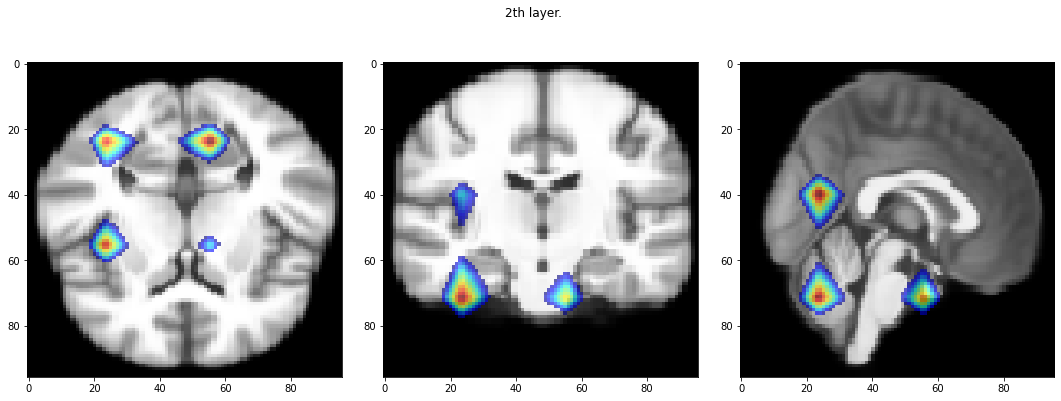

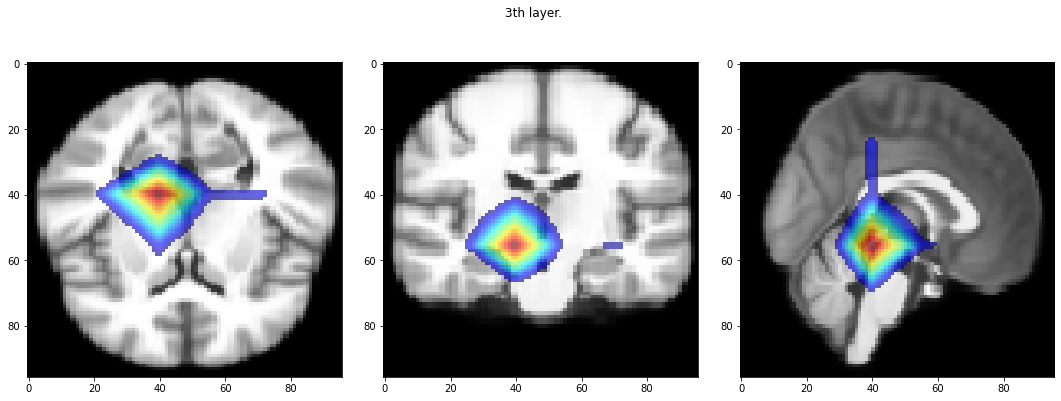

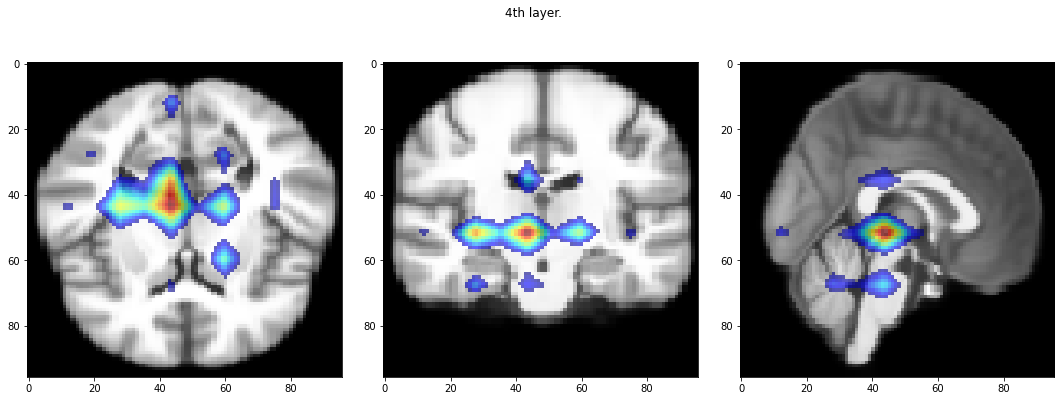

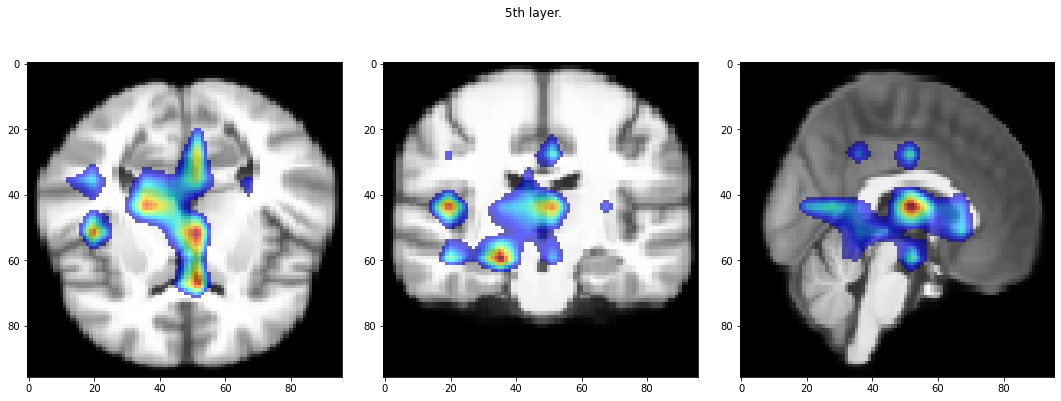

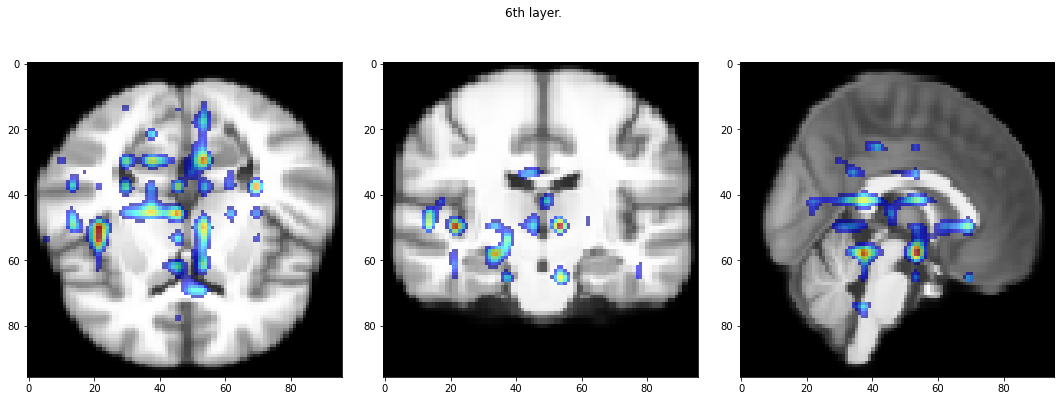

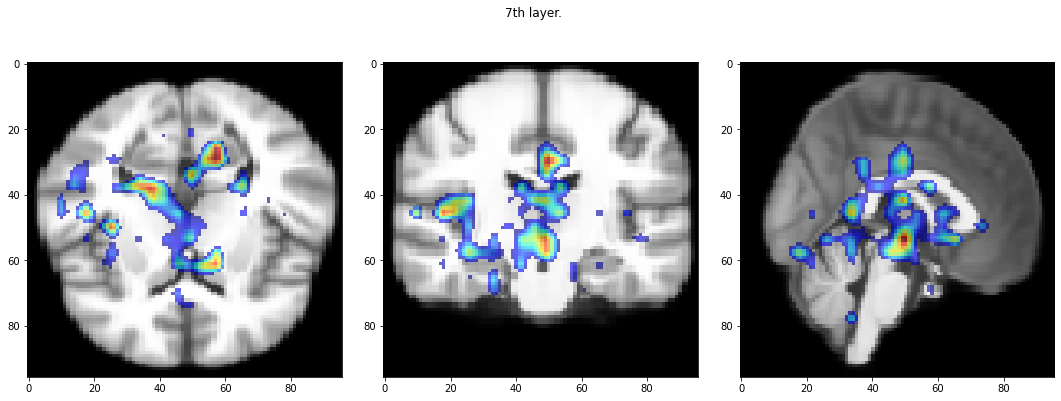

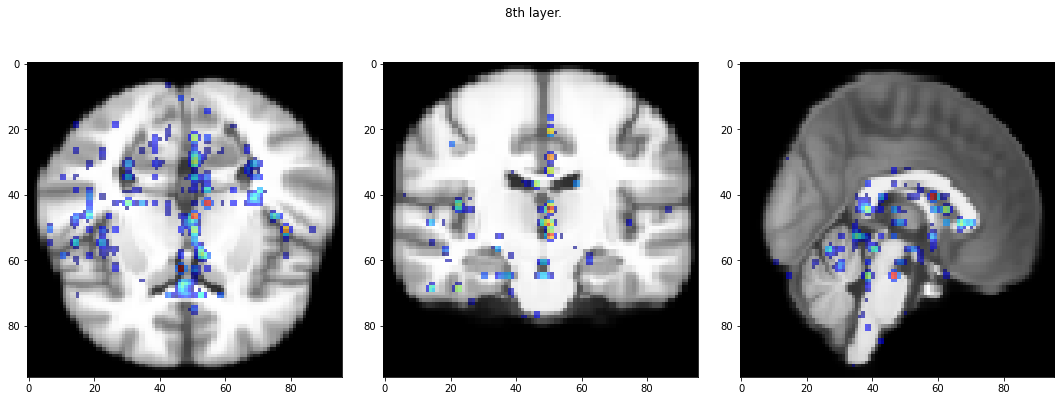

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 15.210
[true] 51 [pred] 10.705
[true] 66 [pred] 12.283
[true] 84 [pred] 15.567
[true] 72 [pred] 12.899
[true] 83 [pred] 21.558
[true] 53 [pred] 11.050
[true] 31 [pred] 11.611
[true] 70 [pred] 12.297
[true] 73 [pred] 11.826
[true] 23 [pred] 14.293
[true] 71 [pred] 11.707
[true] 81 [pred] 16.905
[true] 65 [pred] 10.526
[true] 71 [pred] 14.302
[true] 80 [pred] 15.060
[true] 22 [pred] 10.701
[true] 27 [pred] 7.642
[true] 65 [pred] 12.300
[true] 56 [pred] 12.479
[true] 58 [pred] 10.673
[true] 50 [pred] 10.788
[true] 61 [pred] 8.349
[true] 73 [pred] 18.750
[true] 53 [pred] 13.127
[true] 26 [pred] 14.143
[true] 69 [pred] 13.939
[true] 76 [pred] 11.821
[true] 67 [pred] 12.123
[true] 34 [pred] 8.817
[true] 75 [pred] 20.422
[true] 21 [pred] 11.344
[true] 75 [pred] 16.341
[true] 70 [pred] 14.925
[true] 46 [pred] 8.044
[true] 23 [pred] 9.840
[true] 72 [pred] 13.784
[true] 48 [pred] 14.719
[true] 68 [pred] 11.555
[true] 34 [

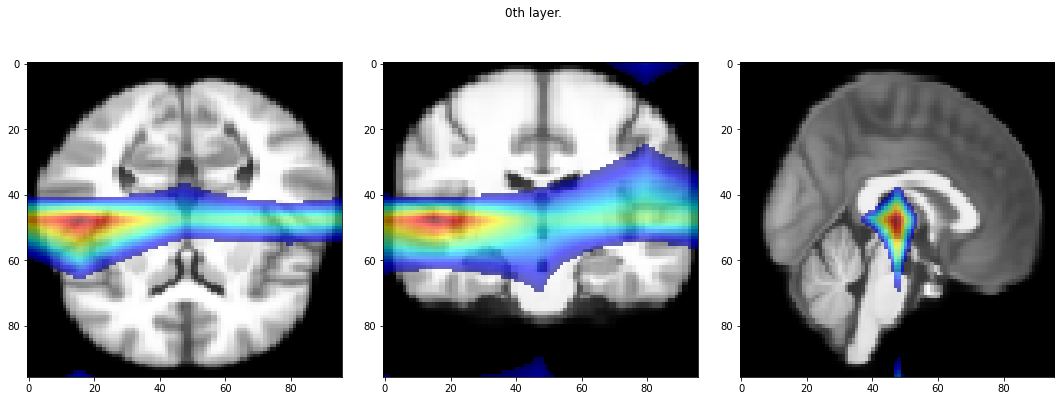

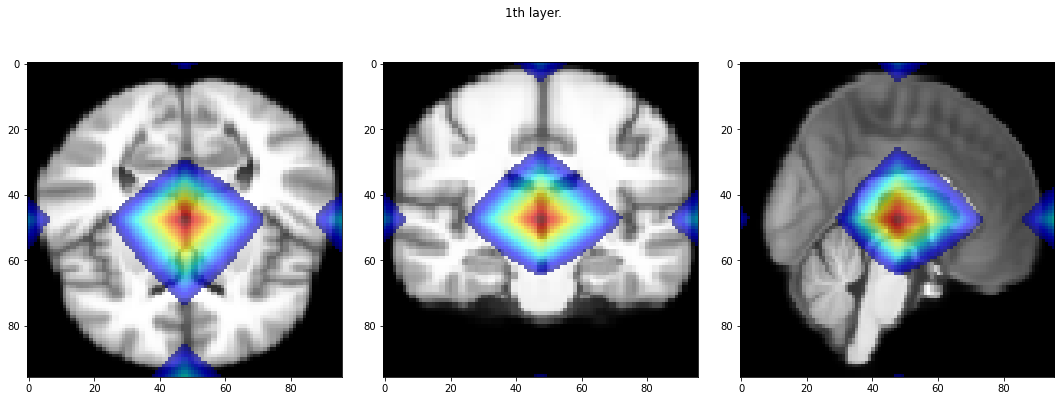

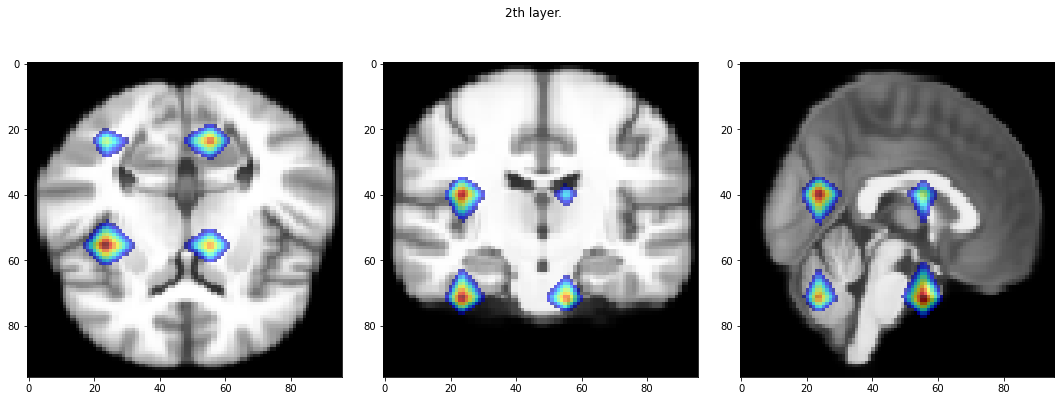

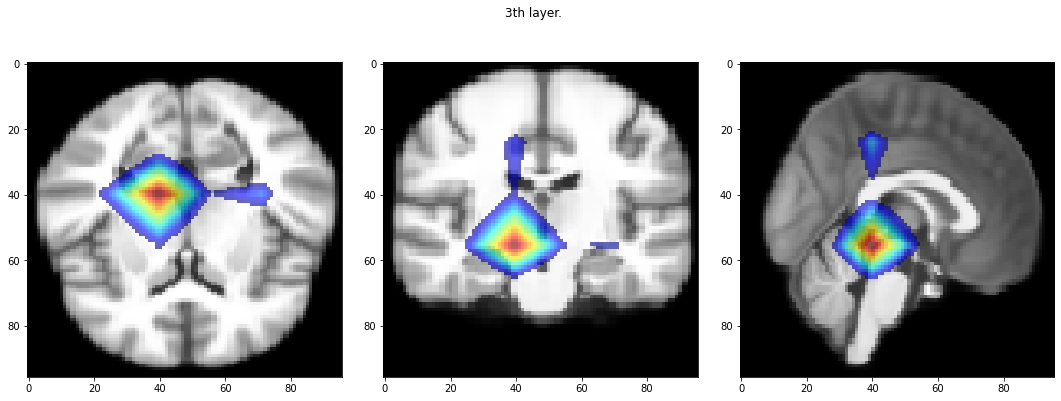

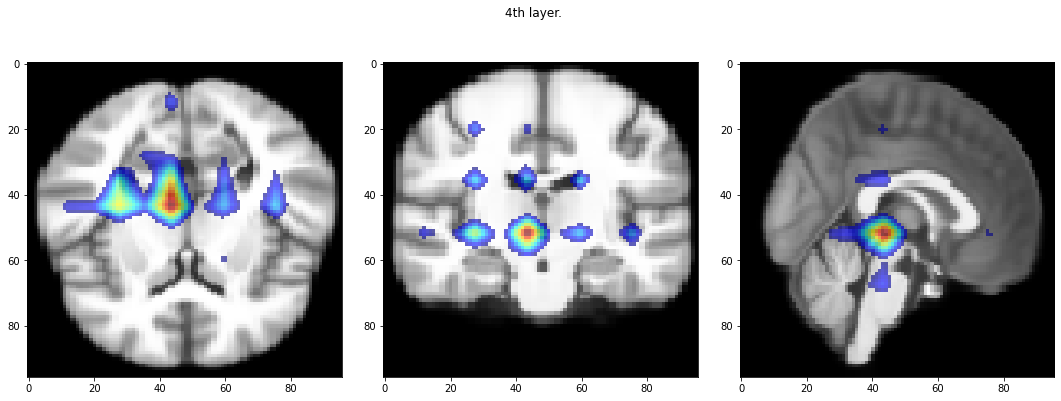

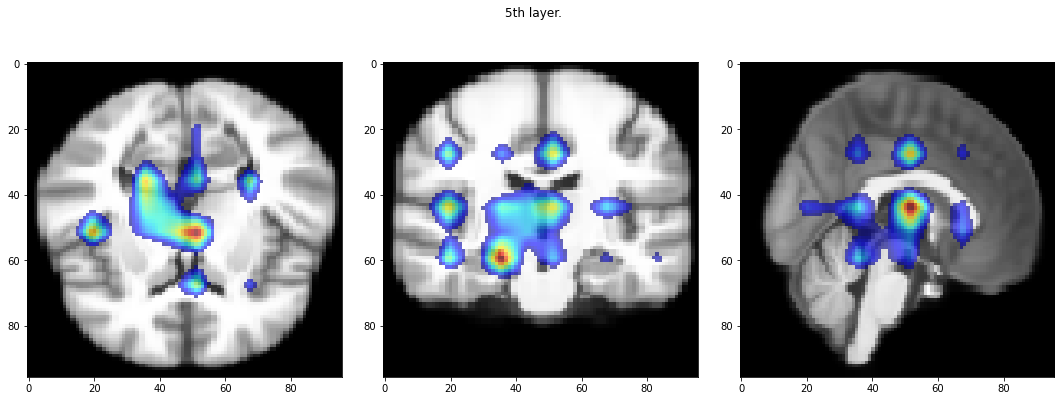

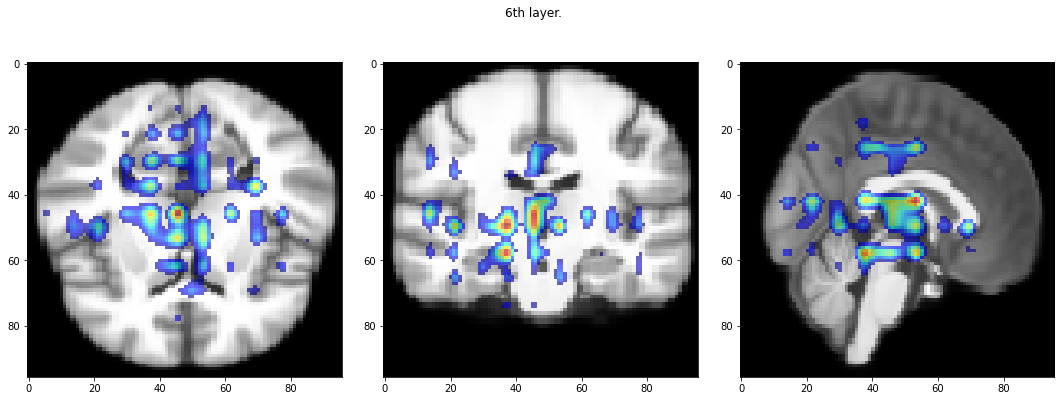

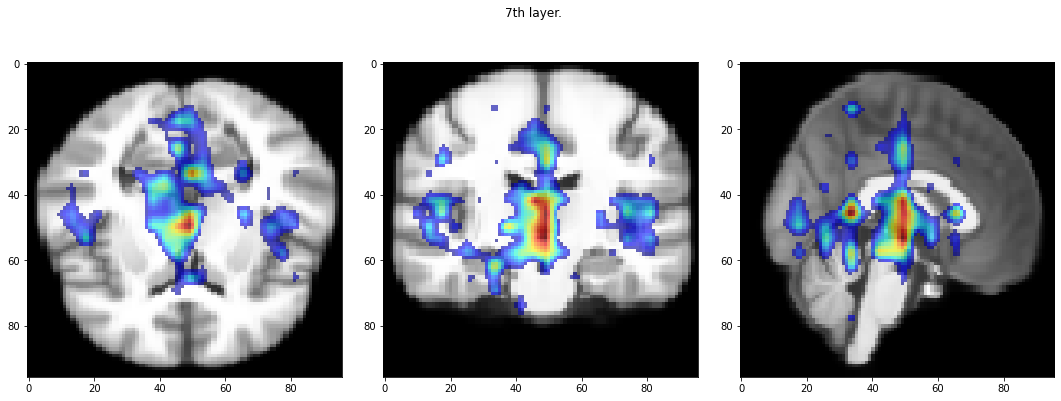

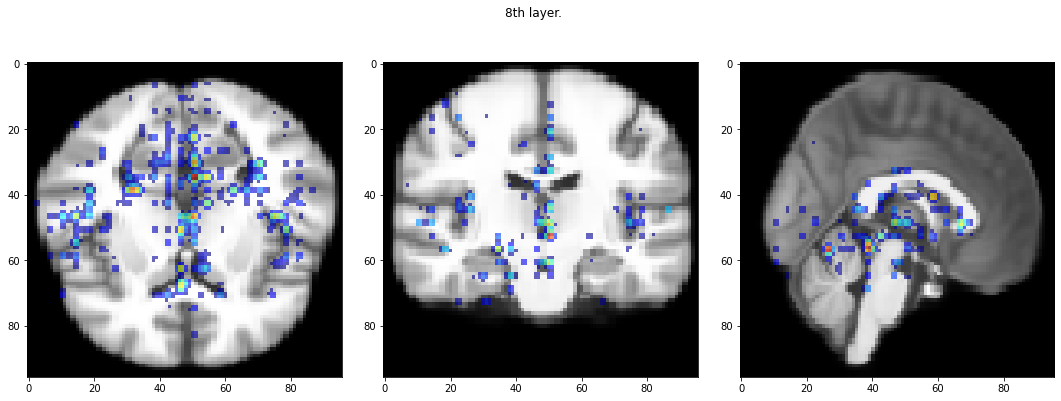

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 51.104
[true] 51 [pred] 37.175
[true] 66 [pred] 42.362
[true] 84 [pred] 54.328
[true] 72 [pred] 51.759
[true] 83 [pred] 47.142
[true] 53 [pred] 40.195
[true] 31 [pred] 28.513
[true] 70 [pred] 49.508
[true] 73 [pred] 44.844
[true] 23 [pred] 17.161
[true] 71 [pred] 28.925
[true] 81 [pred] 54.056
[true] 65 [pred] 43.325
[true] 71 [pred] 52.126
[true] 80 [pred] 53.271
[true] 22 [pred] 13.437
[true] 27 [pred] 13.694
[true] 65 [pred] 43.307
[true] 56 [pred] 41.546
[true] 58 [pred] 43.197
[true] 50 [pred] 40.066
[true] 61 [pred] 31.251
[true] 73 [pred] 36.089
[true] 53 [pred] 42.908
[true] 26 [pred] 15.331
[true] 69 [pred] 49.441
[true] 76 [pred] 46.134
[true] 67 [pred] 49.255
[true] 34 [pred] 34.182
[true] 75 [pred] 41.390
[true] 21 [pred] 13.893
[true] 75 [pred] 50.491
[true] 70 [pred] 50.831
[true] 46 [pred] 23.553
[true] 23 [pred] 27.061
[true] 72 [pred] 53.574
[true] 48 [pred] 17.754
[true] 68 [pred] 46.026
[true]

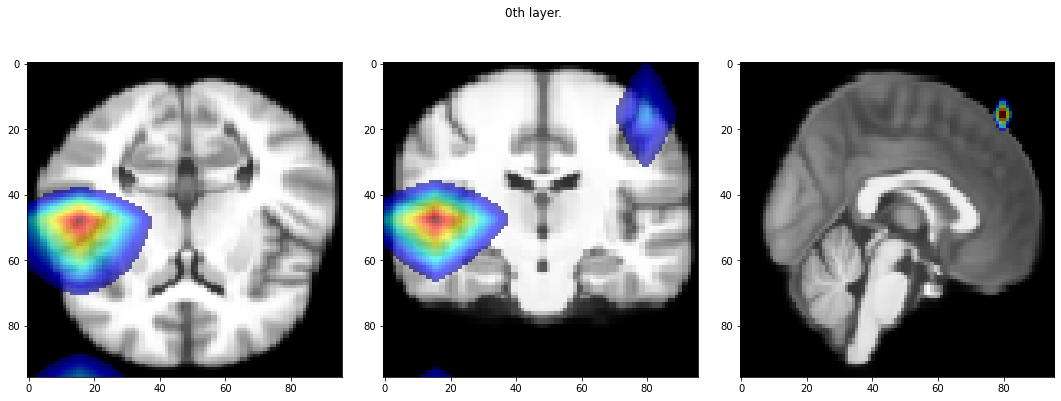

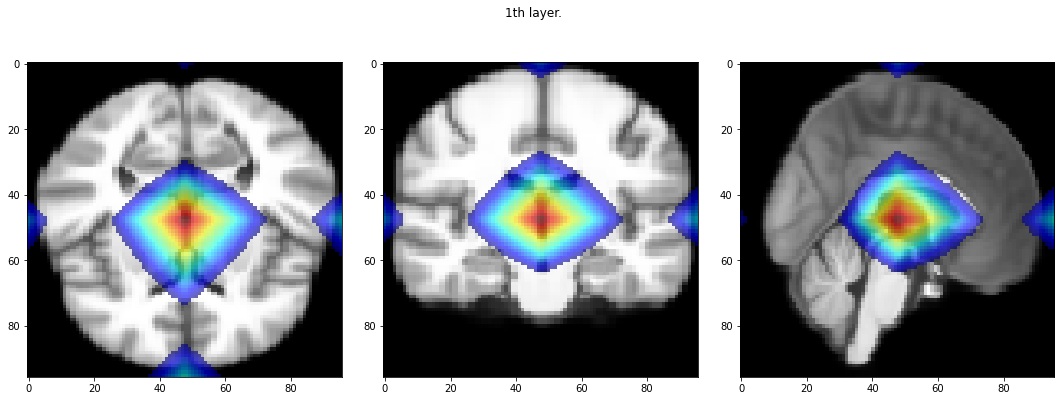

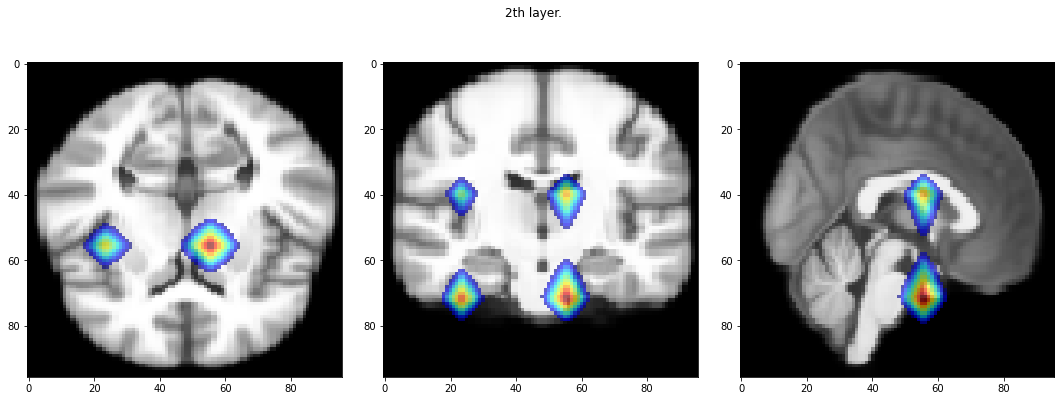

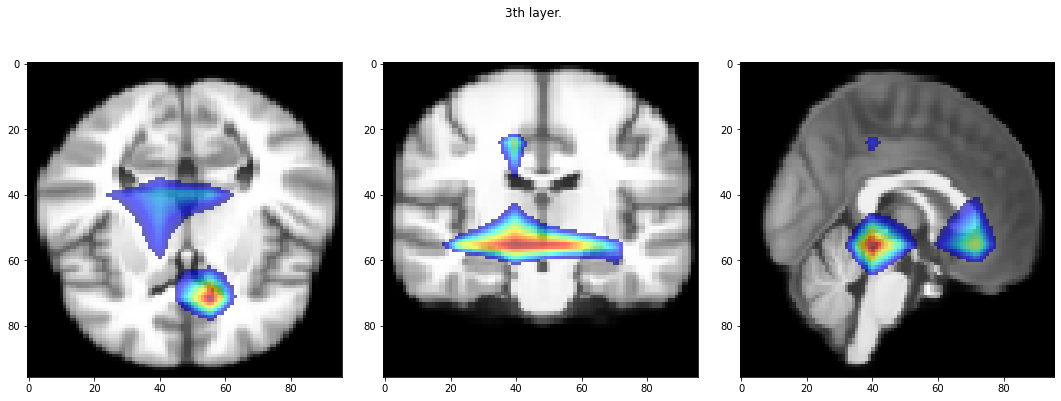

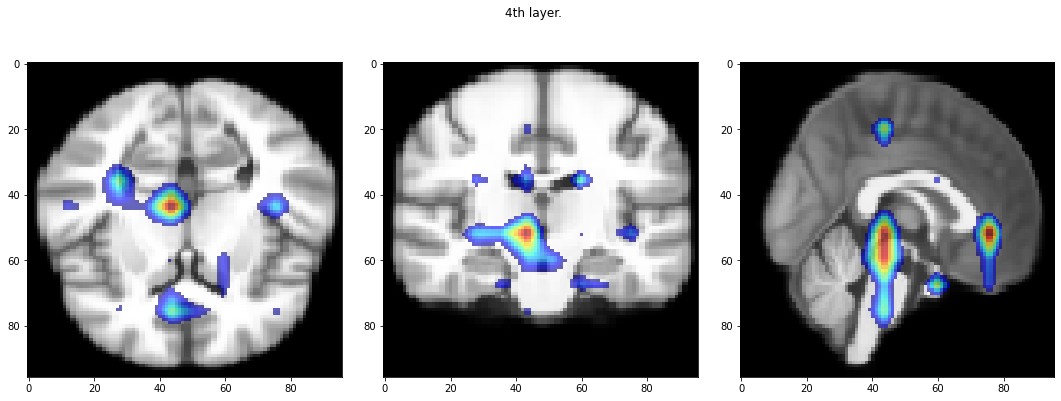

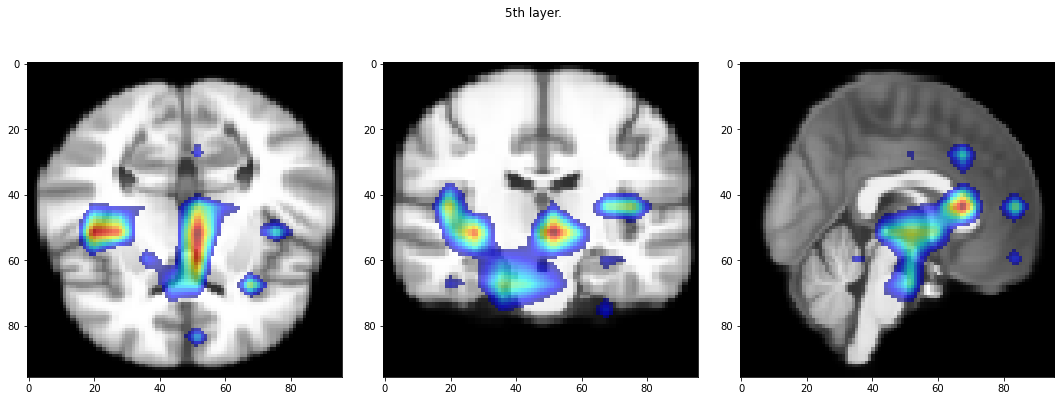

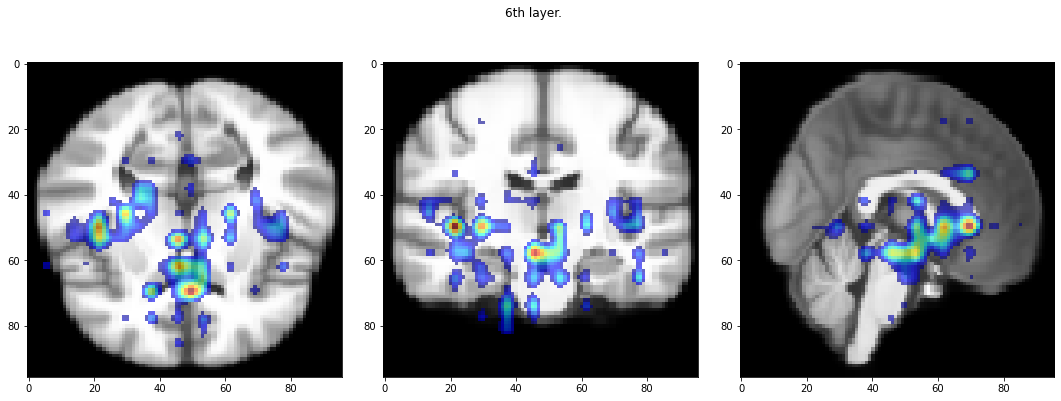

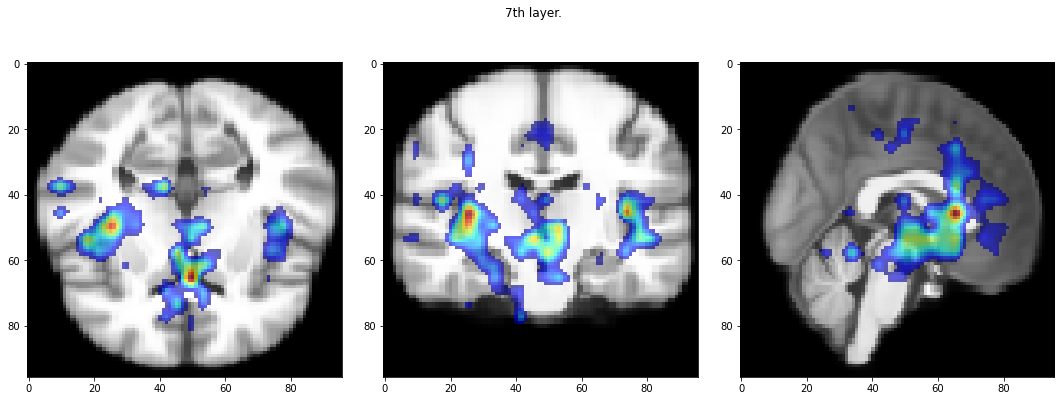

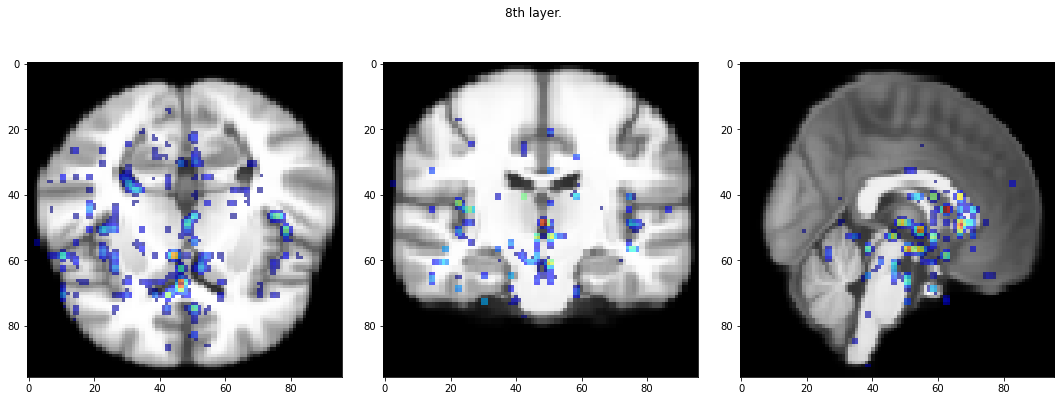

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 59.850
[true] 51 [pred] 39.794
[true] 66 [pred] 46.560
[true] 84 [pred] 69.786
[true] 72 [pred] 65.952
[true] 83 [pred] 75.027
[true] 53 [pred] 46.518
[true] 31 [pred] 35.577
[true] 70 [pred] 60.207
[true] 73 [pred] 54.623
[true] 23 [pred] 20.799
[true] 71 [pred] 59.578
[true] 81 [pred] 68.831
[true] 65 [pred] 47.887
[true] 71 [pred] 64.600
[true] 80 [pred] 63.920
[true] 22 [pred] 18.503
[true] 27 [pred] 19.385
[true] 65 [pred] 56.595
[true] 56 [pred] 49.810
[true] 58 [pred] 52.470
[true] 50 [pred] 46.224
[true] 61 [pred] 36.728
[true] 73 [pred] 55.903
[true] 53 [pred] 48.227
[true] 26 [pred] 24.374
[true] 69 [pred] 62.554
[true] 76 [pred] 56.534
[true] 67 [pred] 63.003
[true] 34 [pred] 36.041
[true] 75 [pred] 72.784
[true] 21 [pred] 21.398
[true] 75 [pred] 62.327
[true] 70 [pred] 61.490
[true] 46 [pred] 34.851
[true] 23 [pred] 25.648
[true] 72 [pred] 67.191
[true] 48 [pred] 36.449
[true] 68 [pred] 54.284
[true]

C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


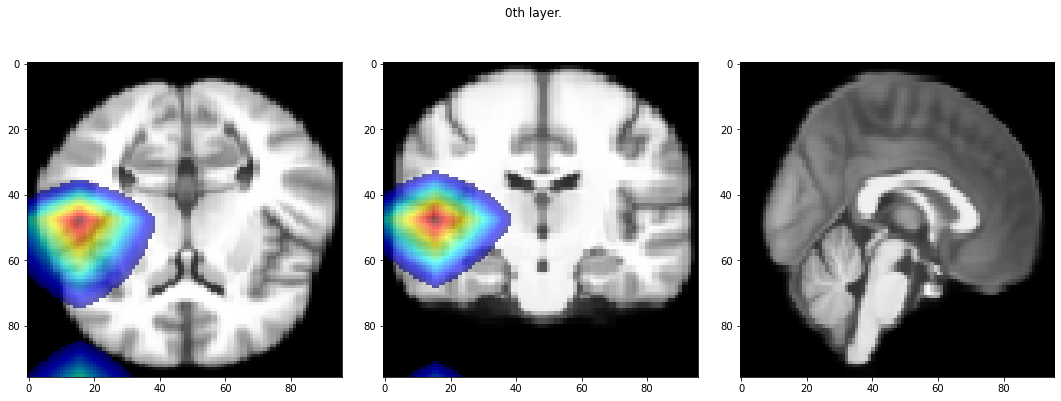

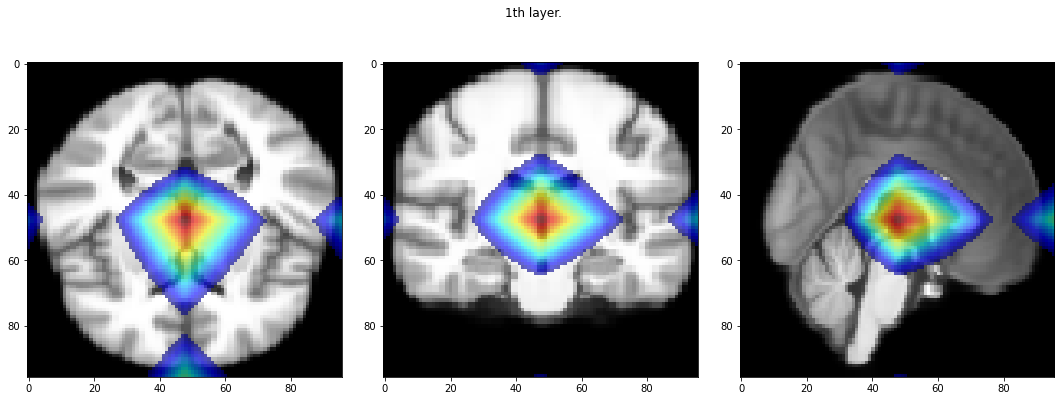

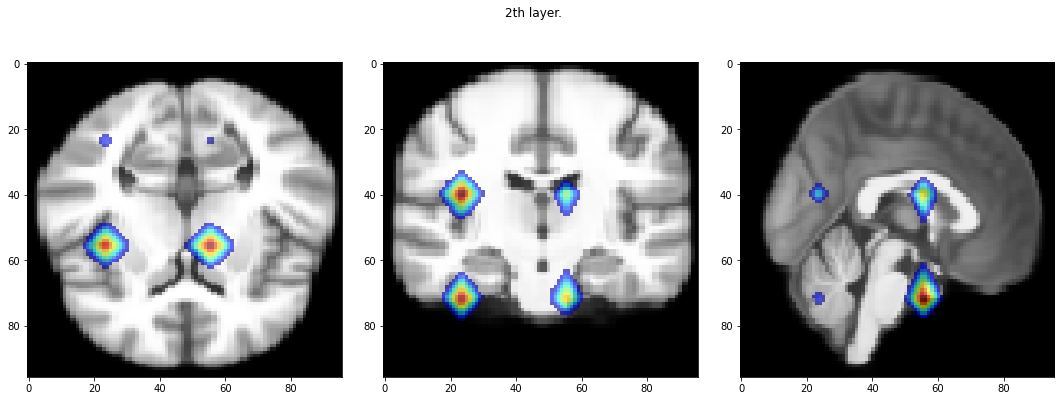

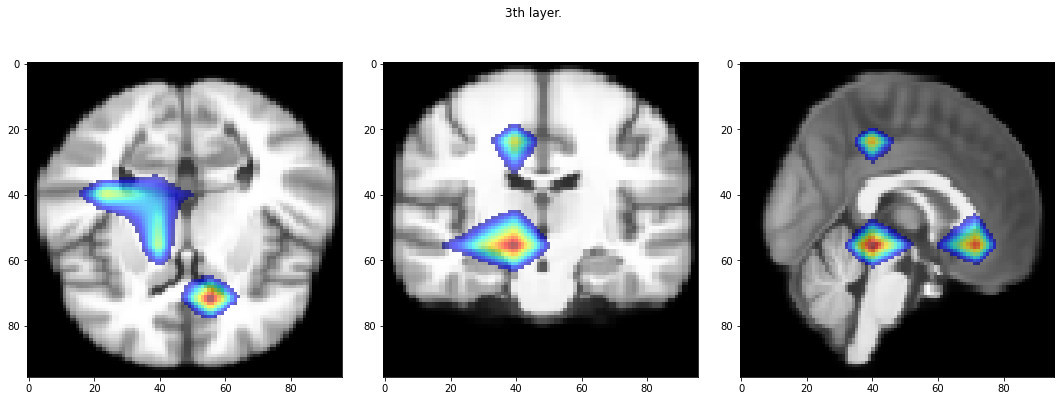

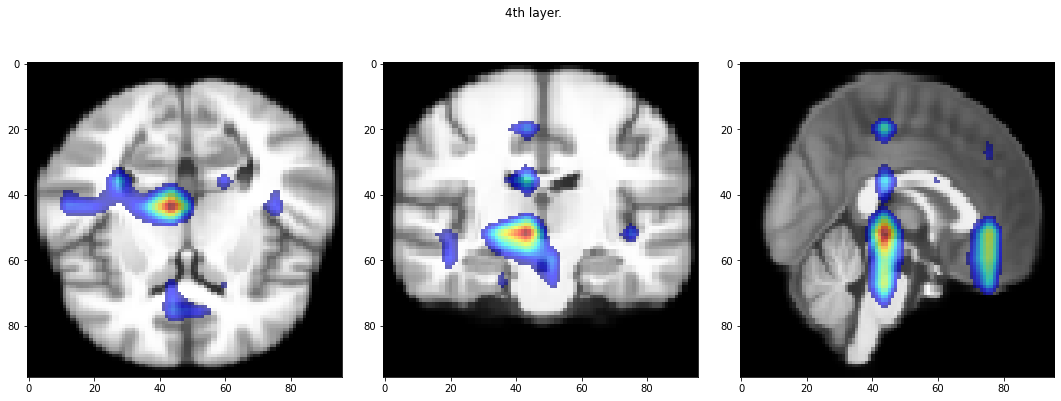

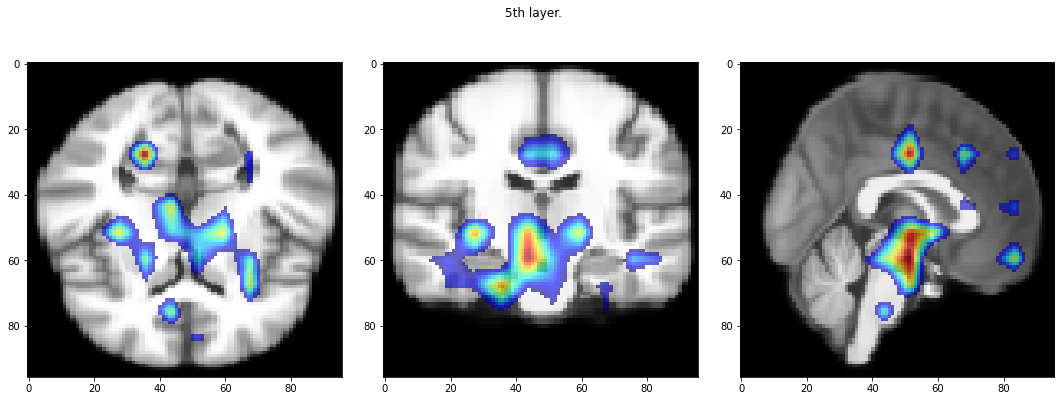

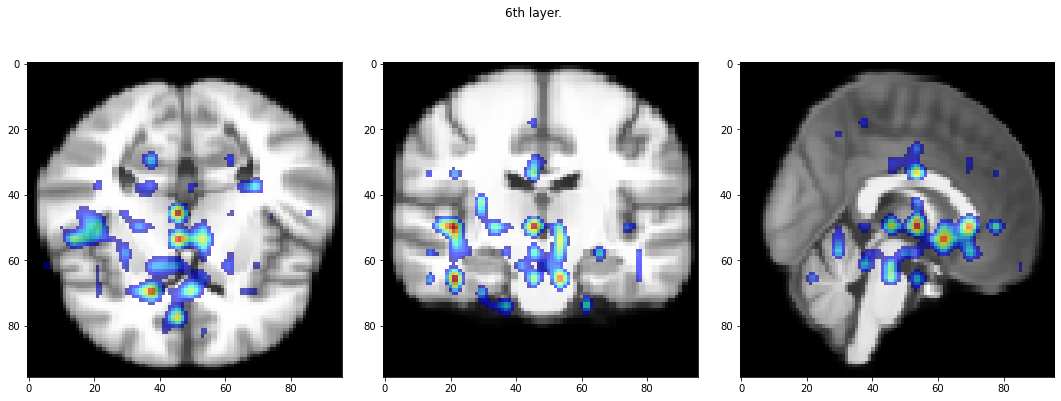

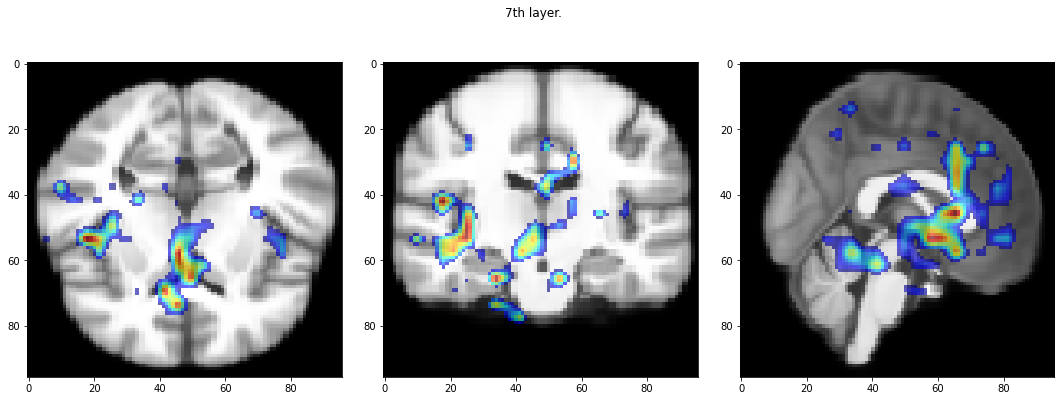

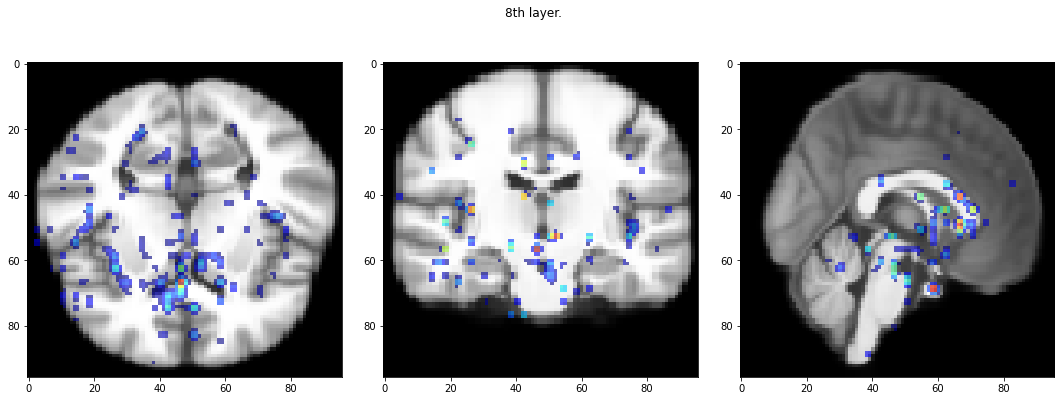

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 69.503
[true] 51 [pred] 52.038
[true] 66 [pred] 55.285
[true] 84 [pred] 88.234
[true] 72 [pred] 73.356
[true] 83 [pred] 76.368
[true] 53 [pred] 55.679
[true] 31 [pred] 36.656
[true] 70 [pred] 71.136
[true] 73 [pred] 65.780
[true] 23 [pred] 20.679
[true] 71 [pred] 60.631
[true] 81 [pred] 82.557
[true] 65 [pred] 58.141
[true] 71 [pred] 76.063
[true] 80 [pred] 80.175
[true] 22 [pred] 17.878
[true] 27 [pred] 20.146
[true] 65 [pred] 66.362
[true] 56 [pred] 56.630
[true] 58 [pred] 60.338
[true] 50 [pred] 55.948
[true] 61 [pred] 39.603
[true] 73 [pred] 57.914
[true] 53 [pred] 61.096
[true] 26 [pred] 26.389
[true] 69 [pred] 75.040
[true] 76 [pred] 64.739
[true] 67 [pred] 75.529
[true] 34 [pred] 44.009
[true] 75 [pred] 75.070
[true] 21 [pred] 22.990
[true] 75 [pred] 84.214
[true] 70 [pred] 78.961
[true] 46 [pred] 37.476
[true] 23 [pred] 32.895
[true] 72 [pred] 78.954
[true] 48 [pred] 41.265
[true] 68 [pred] 64.543
[true]

C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


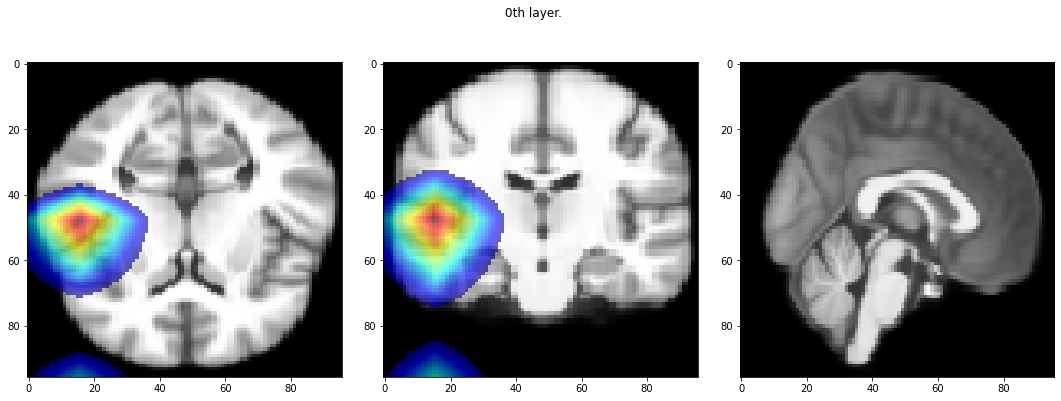

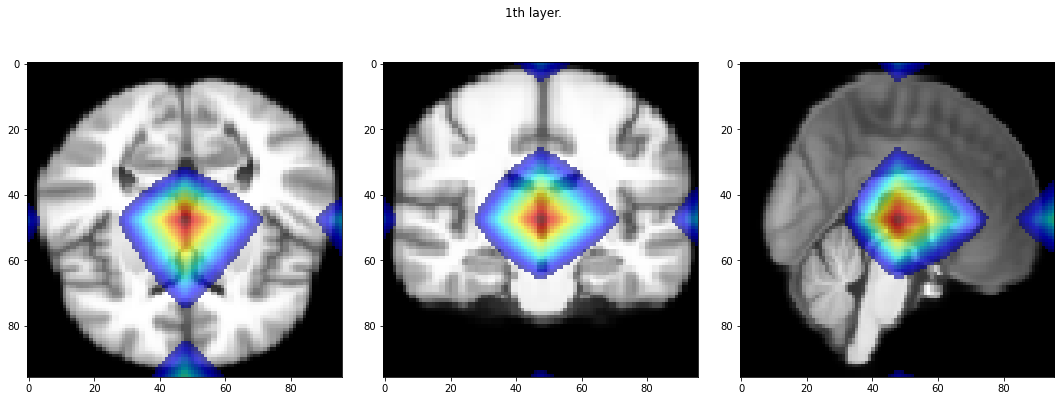

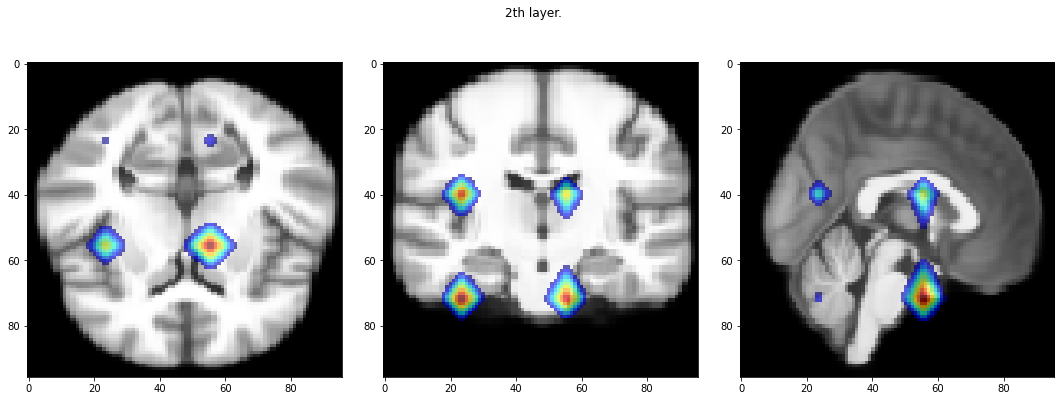

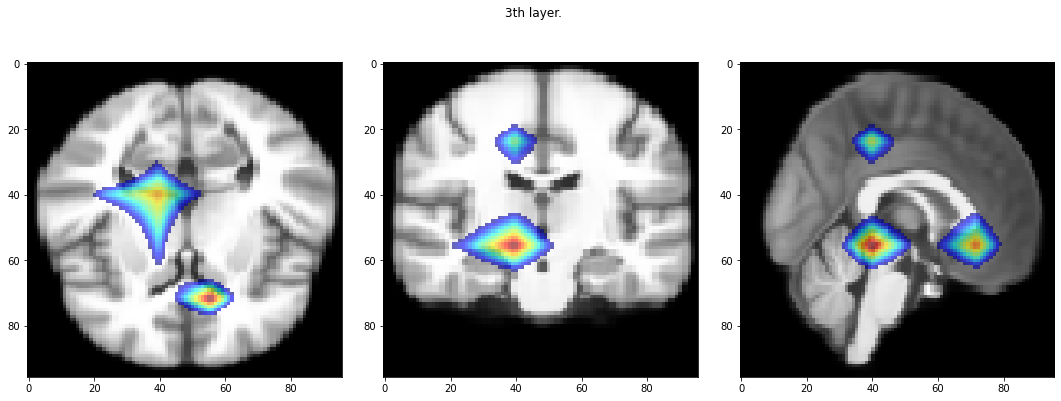

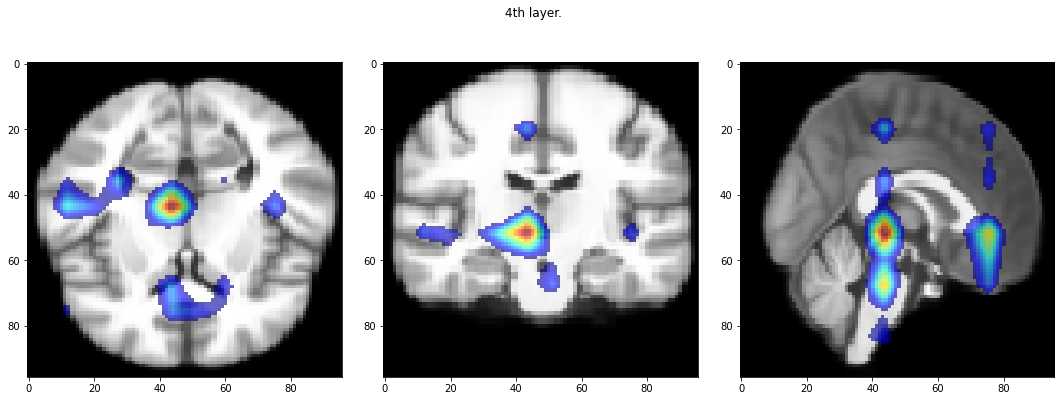

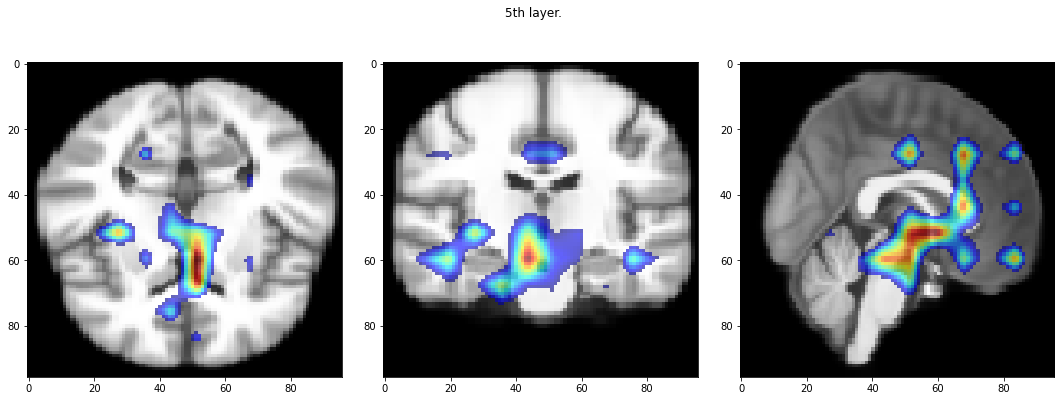

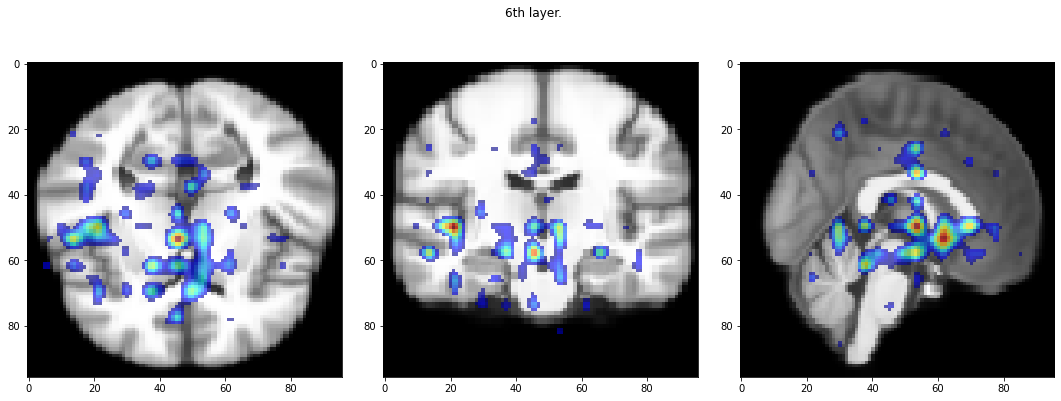

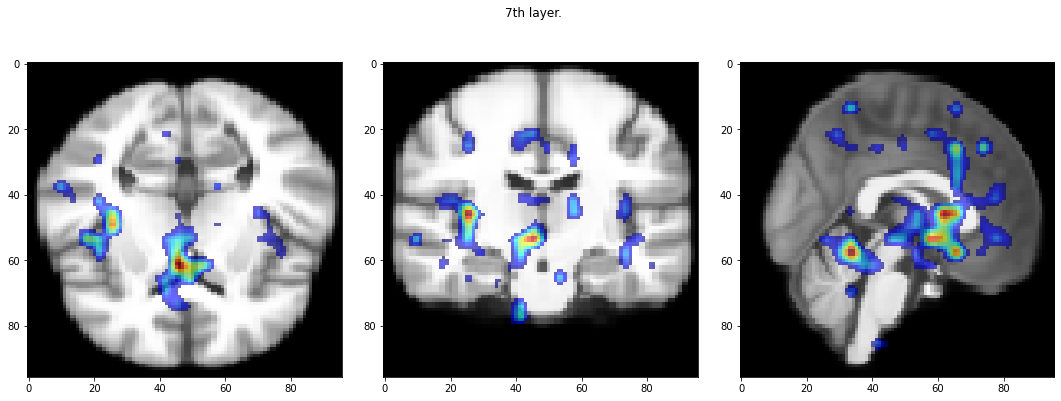

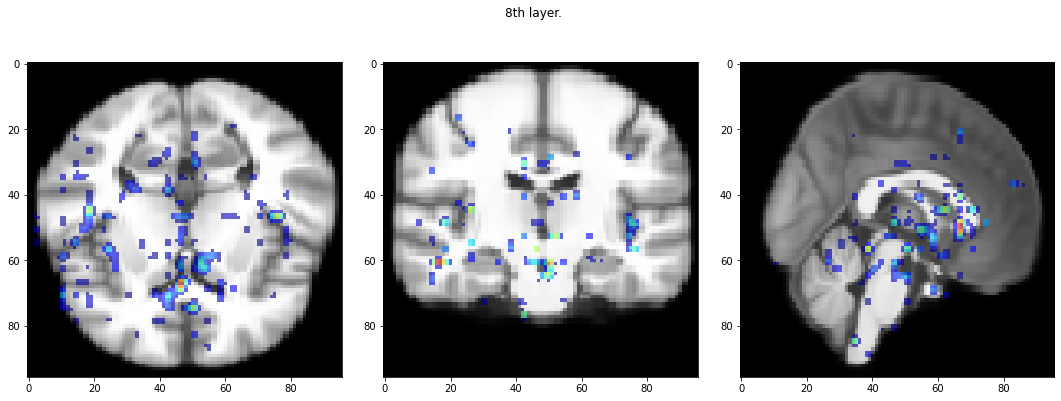

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 65.680
[true] 51 [pred] 48.310
[true] 66 [pred] 57.073
[true] 84 [pred] 75.831
[true] 72 [pred] 69.801
[true] 83 [pred] 78.944
[true] 53 [pred] 50.677
[true] 31 [pred] 34.290
[true] 70 [pred] 65.660
[true] 73 [pred] 68.018
[true] 23 [pred] 26.700
[true] 71 [pred] 57.920
[true] 81 [pred] 69.591
[true] 65 [pred] 59.010
[true] 71 [pred] 66.055
[true] 80 [pred] 76.959
[true] 22 [pred] 19.527
[true] 27 [pred] 25.462
[true] 65 [pred] 59.919
[true] 56 [pred] 53.283
[true] 58 [pred] 58.667
[true] 50 [pred] 53.608
[true] 61 [pred] 50.908
[true] 73 [pred] 61.632
[true] 53 [pred] 51.830
[true] 26 [pred] 29.185
[true] 69 [pred] 65.243
[true] 76 [pred] 65.560
[true] 67 [pred] 63.595
[true] 34 [pred] 48.604
[true] 75 [pred] 74.458
[true] 21 [pred] 25.583
[true] 75 [pred] 72.224
[true] 70 [pred] 69.715
[true] 46 [pred] 43.338
[true] 23 [pred] 28.040
[true] 72 [pred] 64.525
[true] 48 [pred] 42.863
[true] 68 [pred] 57.771
[true]

C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


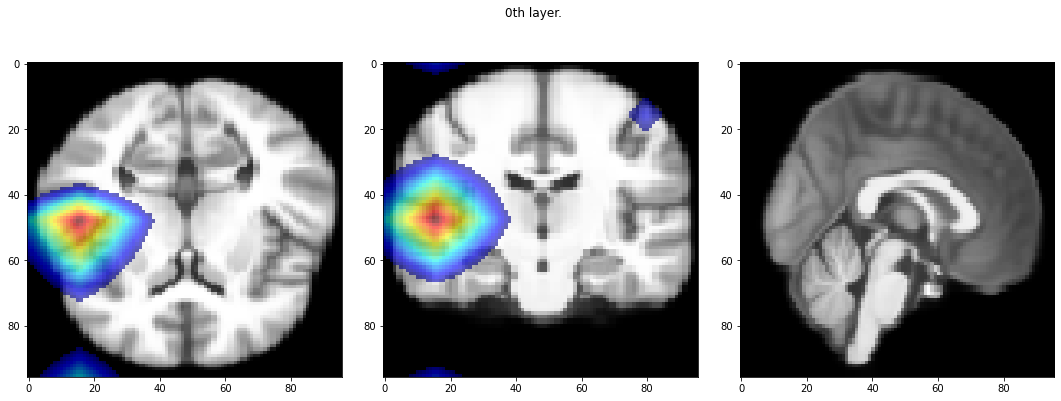

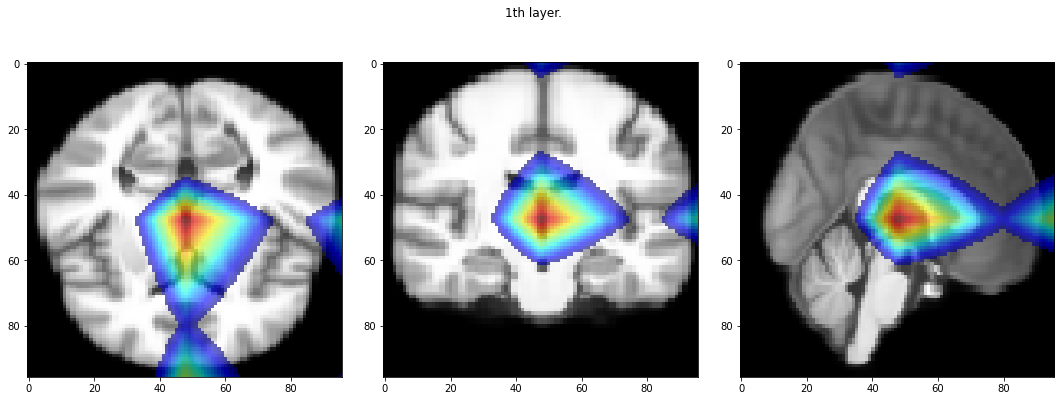

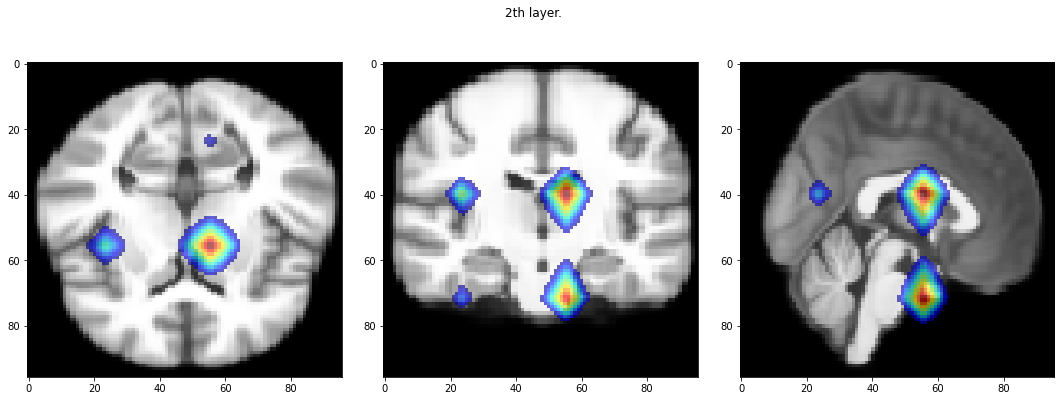

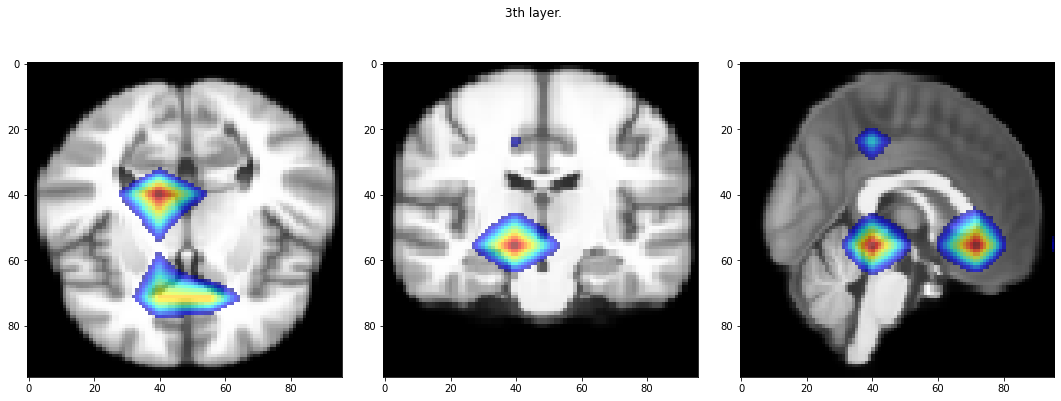

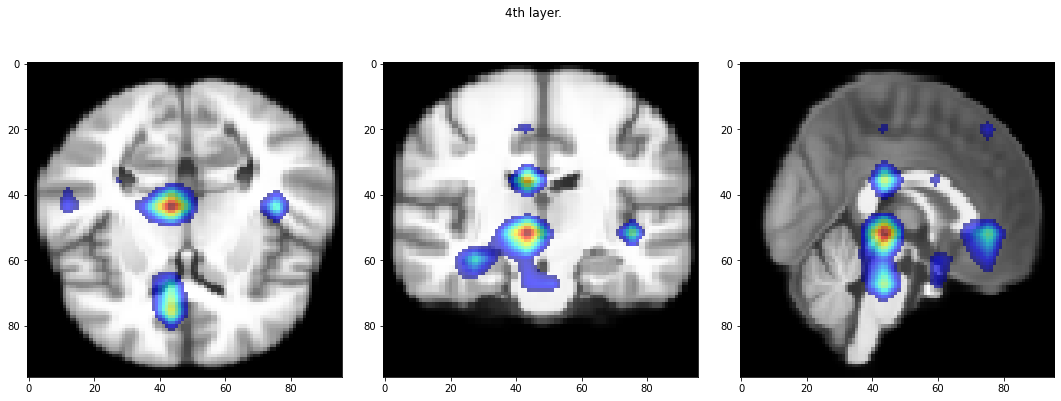

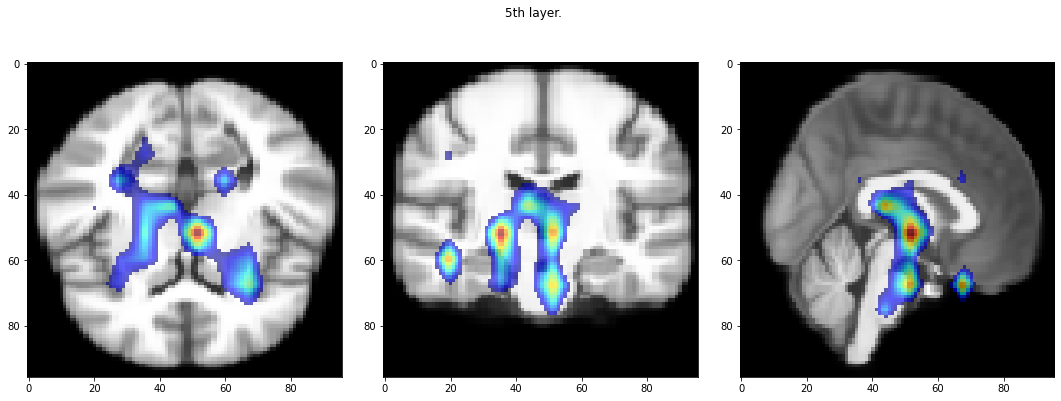

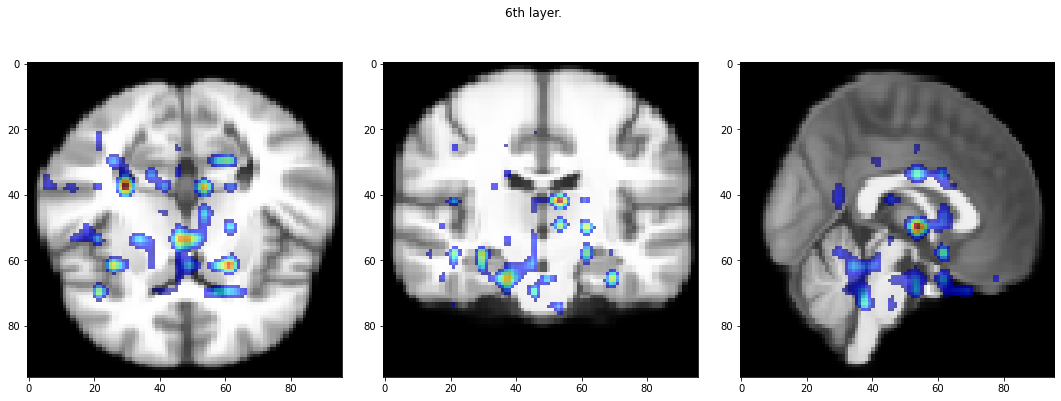

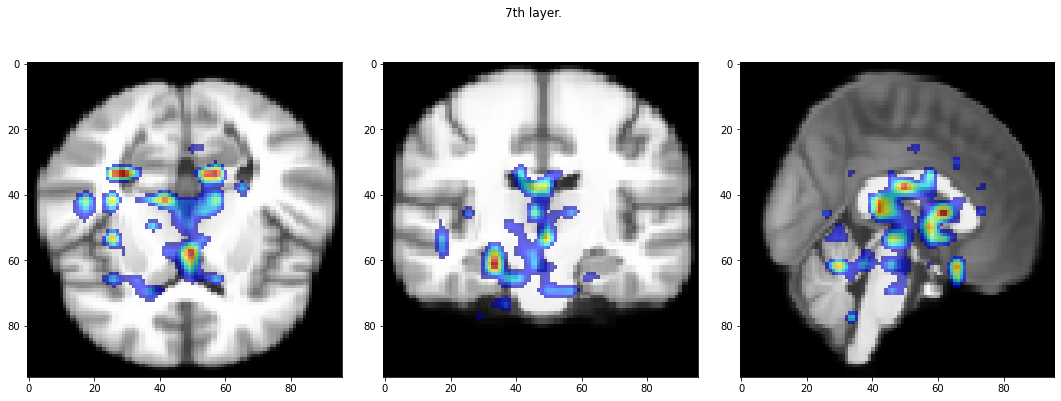

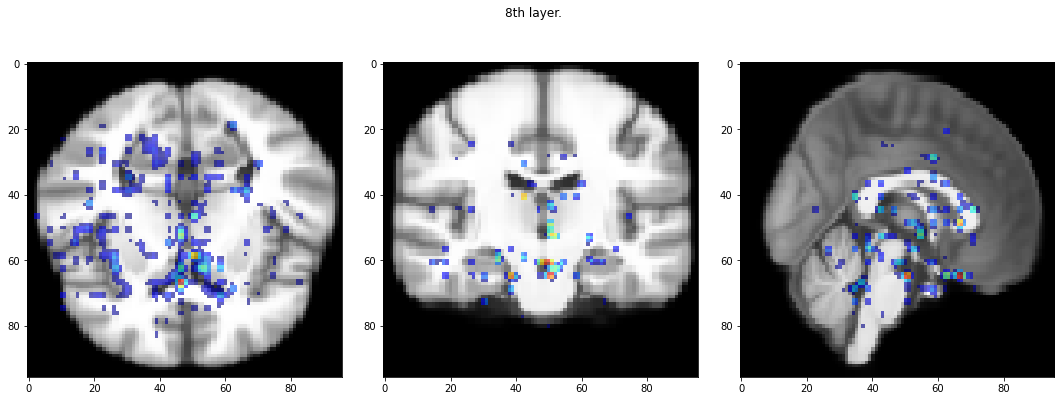

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 67.243
[true] 51 [pred] 45.476
[true] 66 [pred] 64.453
[true] 84 [pred] 73.372
[true] 72 [pred] 71.630
[true] 83 [pred] 81.632
[true] 53 [pred] 48.798
[true] 31 [pred] 34.298
[true] 70 [pred] 65.360
[true] 73 [pred] 70.120
[true] 23 [pred] 21.200
[true] 71 [pred] 66.861
[true] 81 [pred] 70.426
[true] 65 [pred] 61.488
[true] 71 [pred] 69.532
[true] 80 [pred] 71.212
[true] 22 [pred] 19.514
[true] 27 [pred] 26.372
[true] 65 [pred] 67.574
[true] 56 [pred] 51.721
[true] 58 [pred] 57.181
[true] 50 [pred] 51.866
[true] 61 [pred] 54.870
[true] 73 [pred] 58.050
[true] 53 [pred] 47.807
[true] 26 [pred] 26.466
[true] 69 [pred] 64.870
[true] 76 [pred] 67.543
[true] 67 [pred] 65.202
[true] 34 [pred] 44.330
[true] 75 [pred] 75.154
[true] 21 [pred] 24.241
[true] 75 [pred] 73.995
[true] 70 [pred] 67.635
[true] 46 [pred] 48.721
[true] 23 [pred] 25.449
[true] 72 [pred] 63.143
[true] 48 [pred] 43.501
[true] 68 [pred] 60.992
[true]

C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


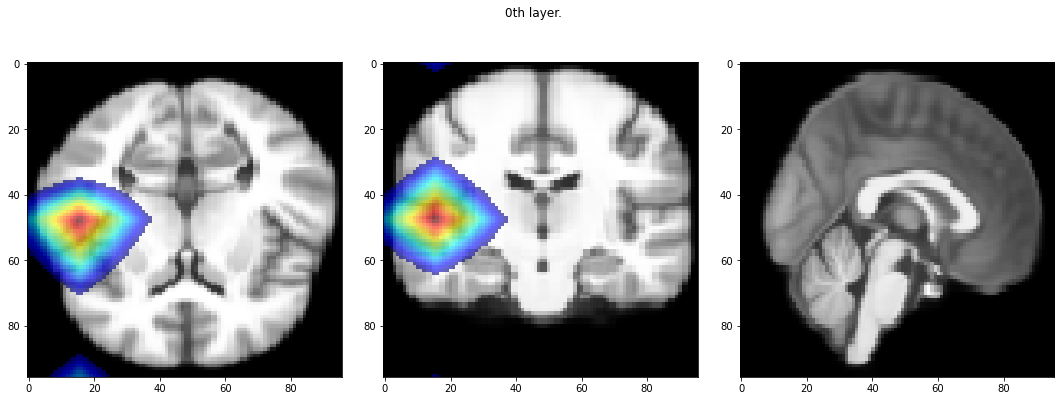

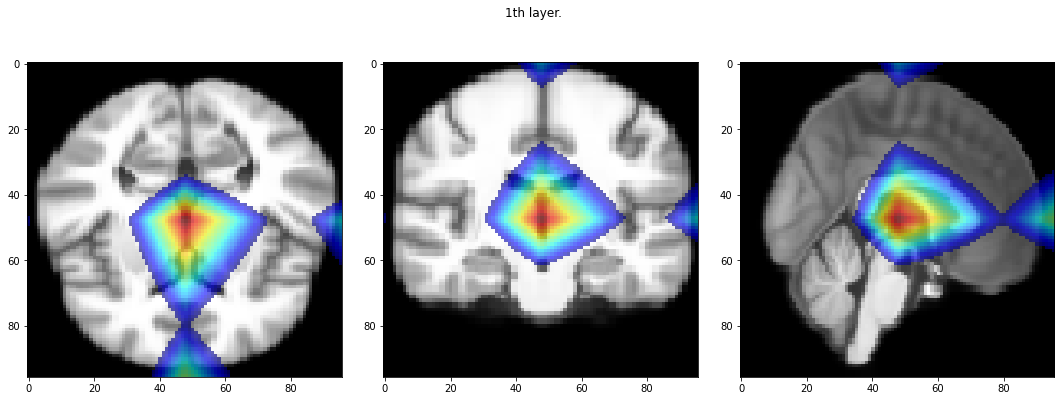

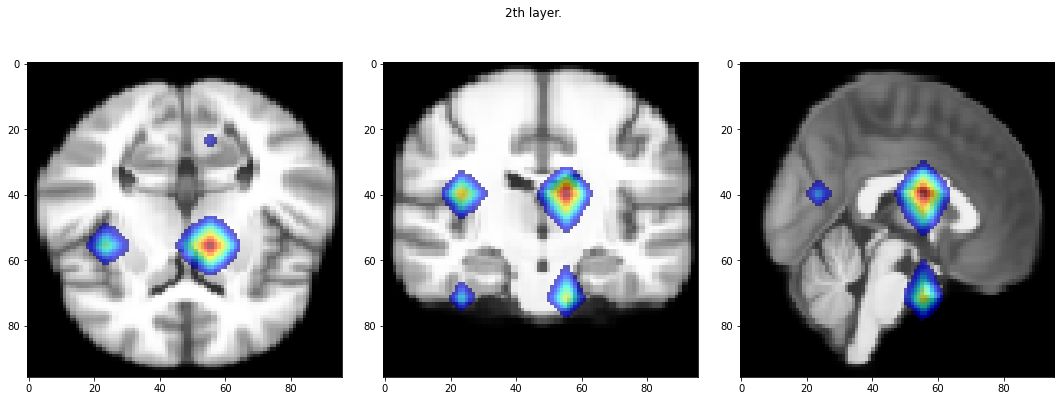

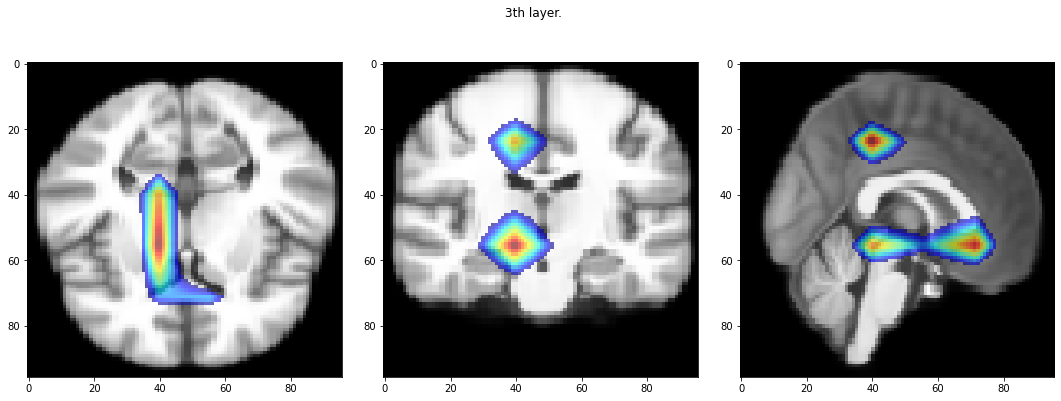

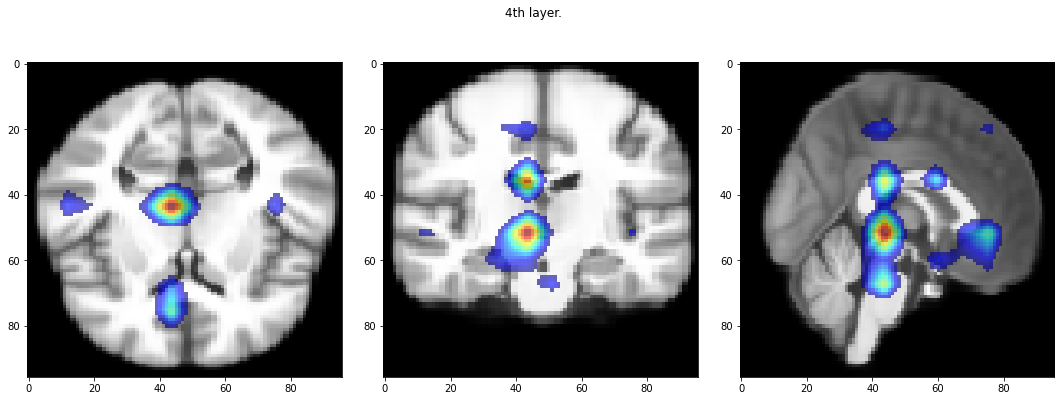

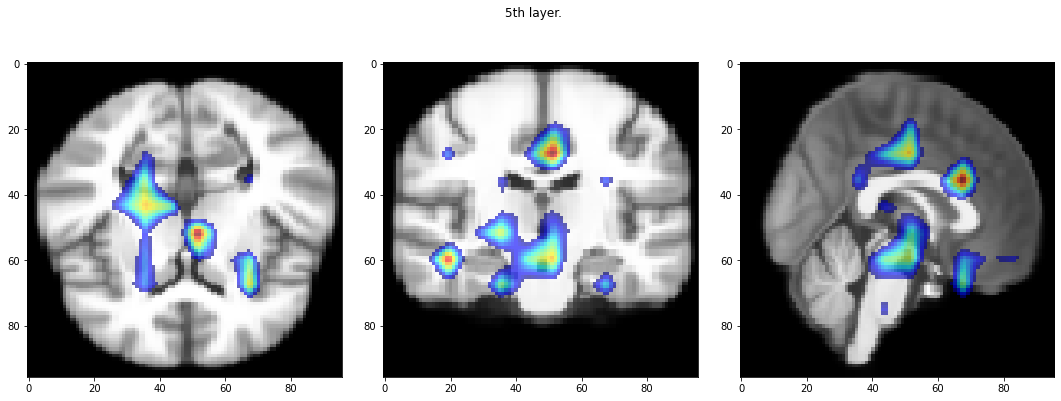

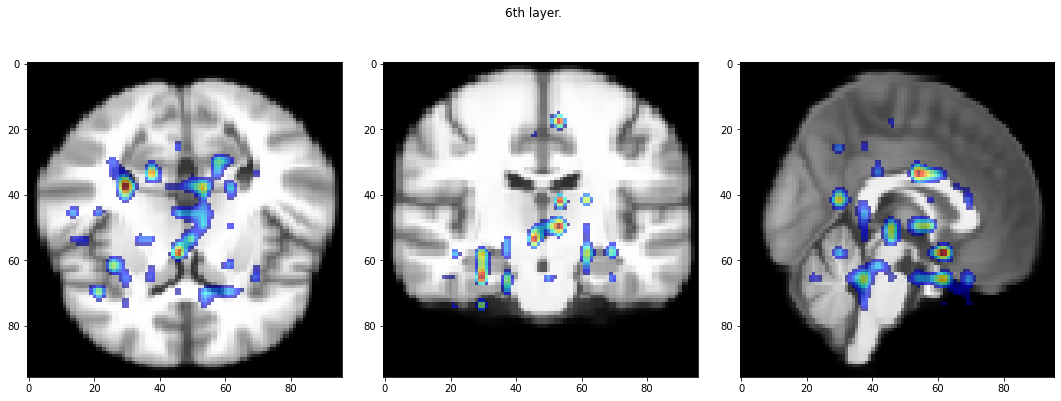

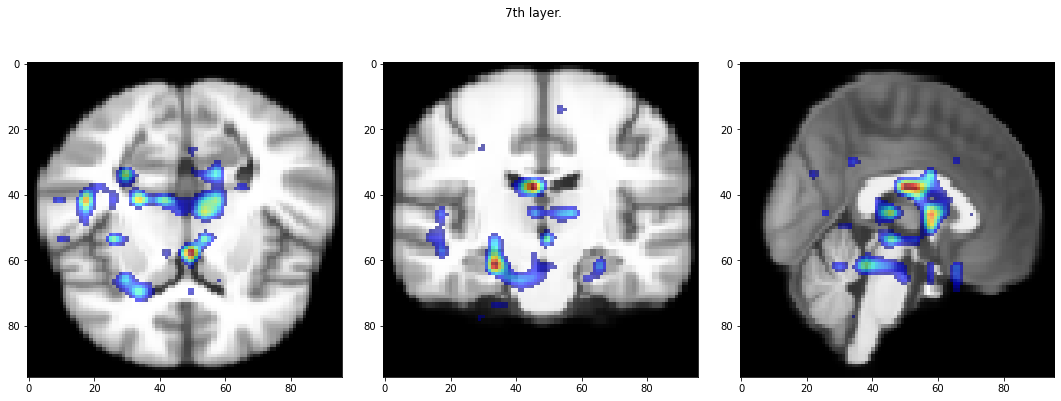

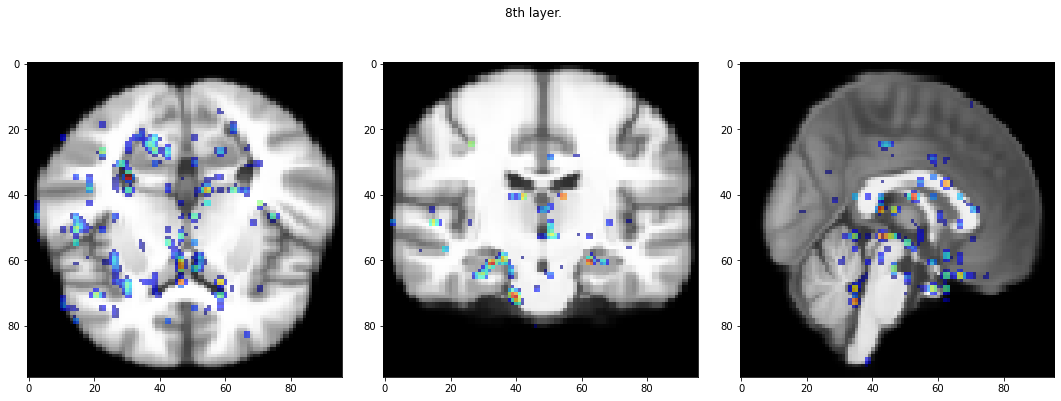

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 73.154
[true] 51 [pred] 49.511
[true] 66 [pred] 67.073
[true] 84 [pred] 85.953
[true] 72 [pred] 76.986
[true] 83 [pred] 86.917
[true] 53 [pred] 53.997
[true] 31 [pred] 29.076
[true] 70 [pred] 73.160
[true] 73 [pred] 71.723
[true] 23 [pred] 23.714
[true] 71 [pred] 65.596
[true] 81 [pred] 76.558
[true] 65 [pred] 64.830
[true] 71 [pred] 73.604
[true] 80 [pred] 75.883
[true] 22 [pred] 19.992
[true] 27 [pred] 21.770
[true] 65 [pred] 66.486
[true] 56 [pred] 59.471
[true] 58 [pred] 64.705
[true] 50 [pred] 57.806
[true] 61 [pred] 56.052
[true] 73 [pred] 64.128
[true] 53 [pred] 55.977
[true] 26 [pred] 23.891
[true] 69 [pred] 73.030
[true] 76 [pred] 74.202
[true] 67 [pred] 67.334
[true] 34 [pred] 45.263
[true] 75 [pred] 80.674
[true] 21 [pred] 20.163
[true] 75 [pred] 78.737
[true] 70 [pred] 73.434
[true] 46 [pred] 49.953
[true] 23 [pred] 23.964
[true] 72 [pred] 68.735
[true] 48 [pred] 40.262
[true] 68 [pred] 68.554
[true]

C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


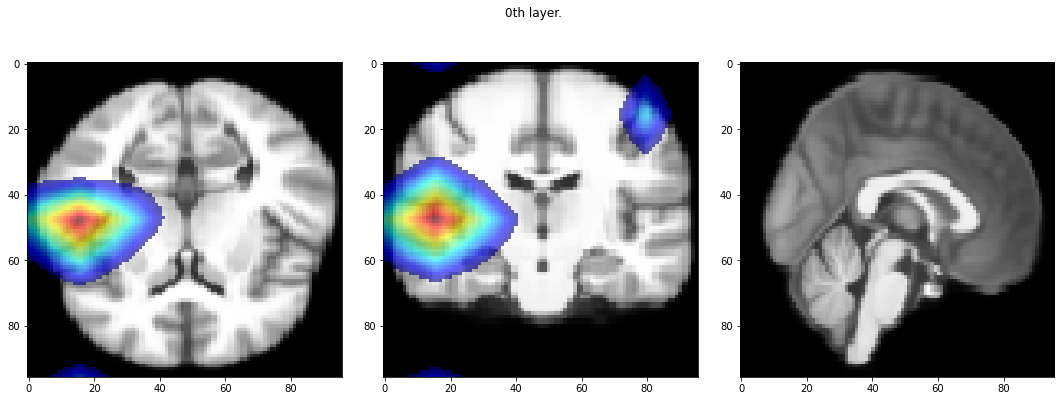

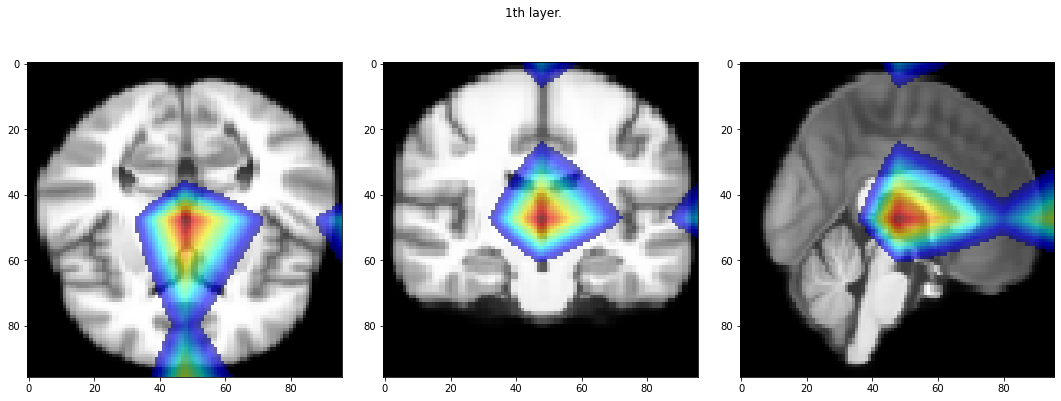

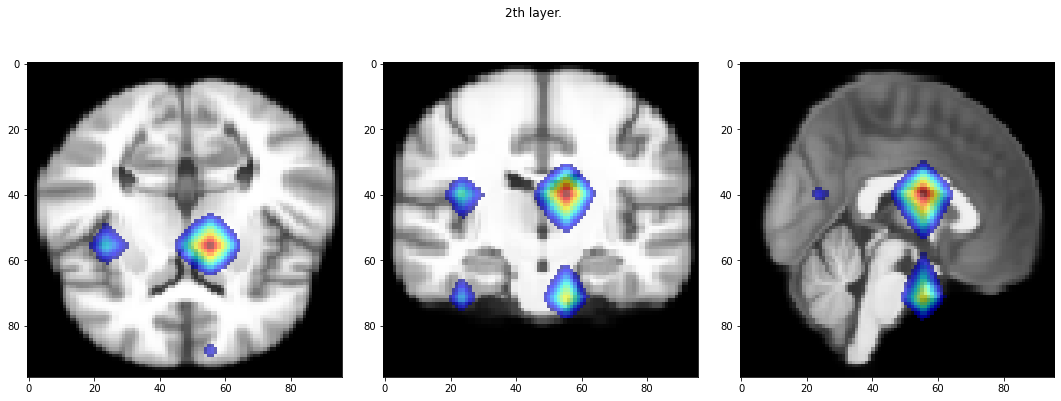

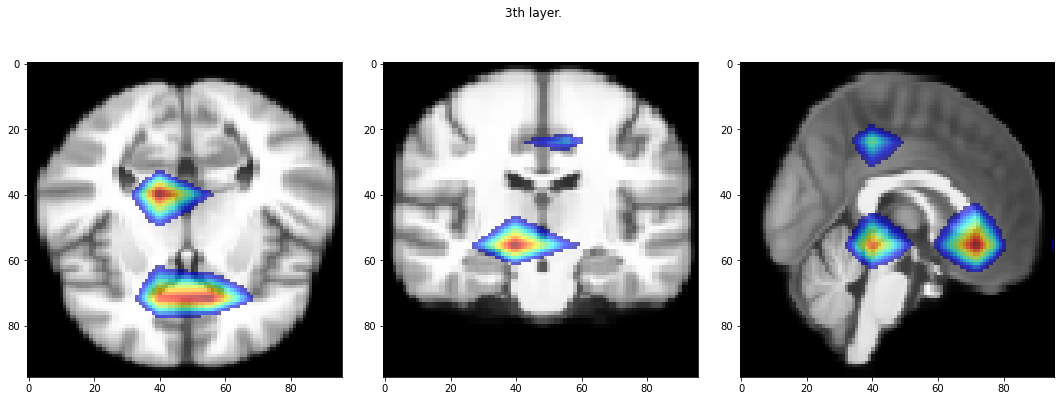

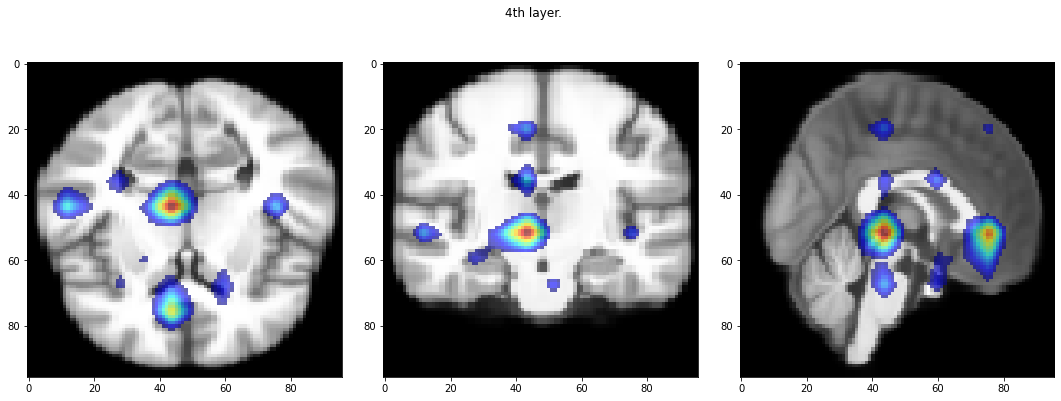

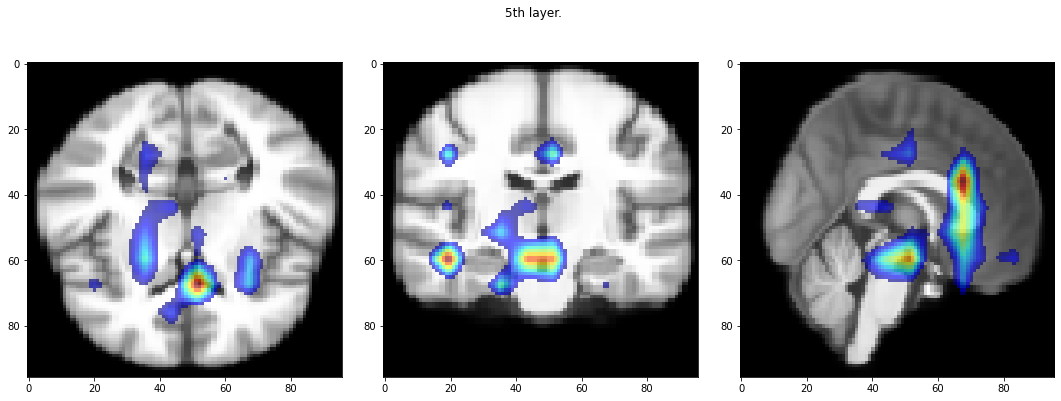

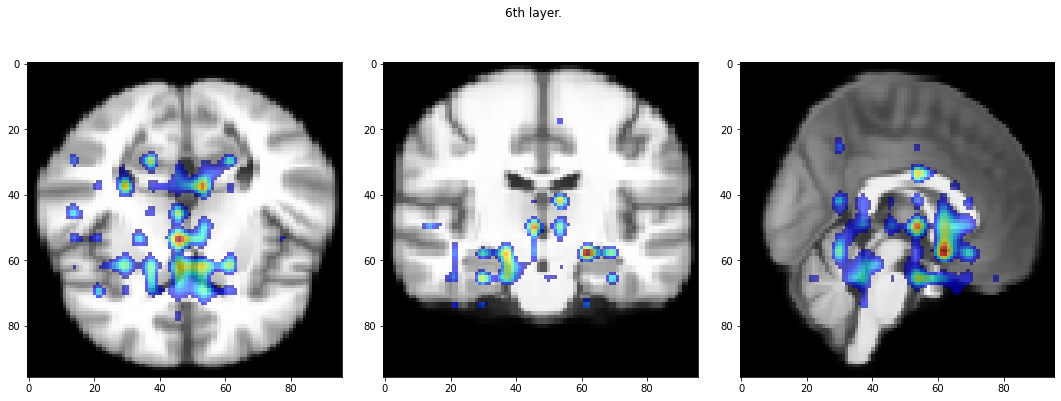

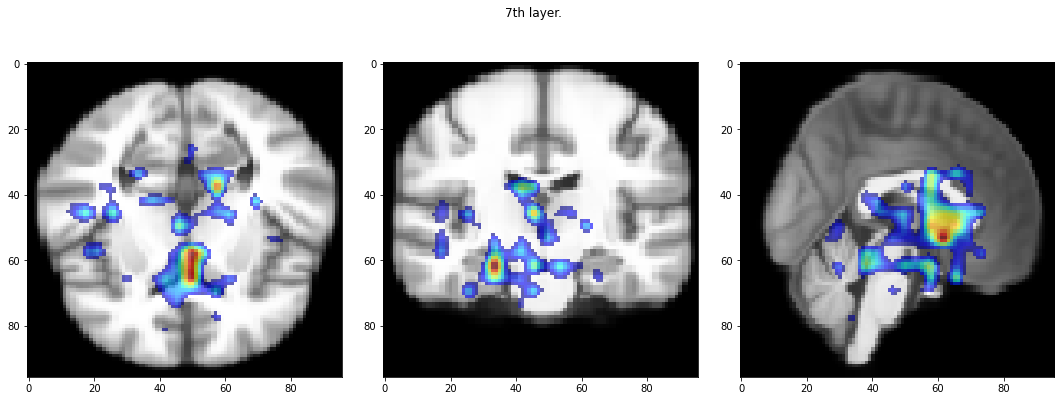

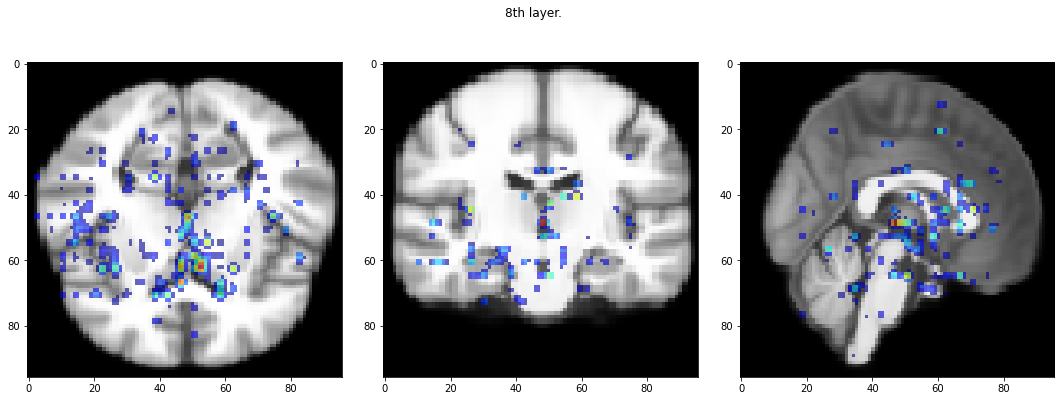

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 70.989
[true] 51 [pred] 51.929
[true] 66 [pred] 64.752
[true] 84 [pred] 84.597
[true] 72 [pred] 76.684
[true] 83 [pred] 88.731
[true] 53 [pred] 53.944
[true] 31 [pred] 34.137
[true] 70 [pred] 72.926
[true] 73 [pred] 76.339
[true] 23 [pred] 23.910
[true] 71 [pred] 62.717
[true] 81 [pred] 79.605
[true] 65 [pred] 65.221
[true] 71 [pred] 73.191
[true] 80 [pred] 76.714
[true] 22 [pred] 20.302
[true] 27 [pred] 23.805
[true] 65 [pred] 64.537
[true] 56 [pred] 57.355
[true] 58 [pred] 65.187
[true] 50 [pred] 59.178
[true] 61 [pred] 57.332
[true] 73 [pred] 65.710
[true] 53 [pred] 55.119
[true] 26 [pred] 25.906
[true] 69 [pred] 70.084
[true] 76 [pred] 74.516
[true] 67 [pred] 67.596
[true] 34 [pred] 49.292
[true] 75 [pred] 76.085
[true] 21 [pred] 21.986
[true] 75 [pred] 75.820
[true] 70 [pred] 71.420
[true] 46 [pred] 47.434
[true] 23 [pred] 24.163
[true] 72 [pred] 70.030
[true] 48 [pred] 40.123
[true] 68 [pred] 69.379
[true]

C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


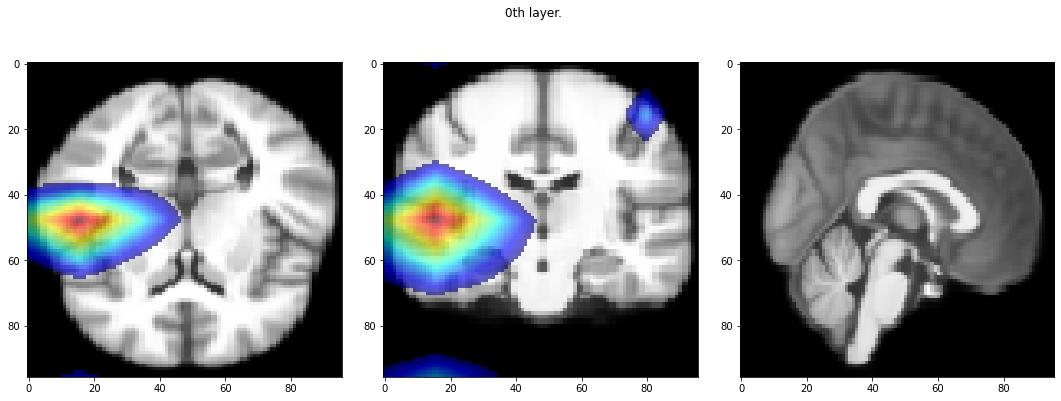

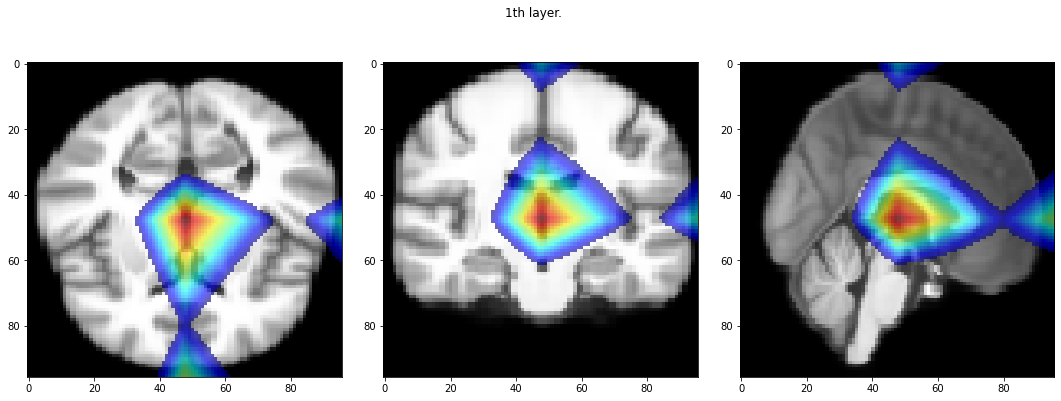

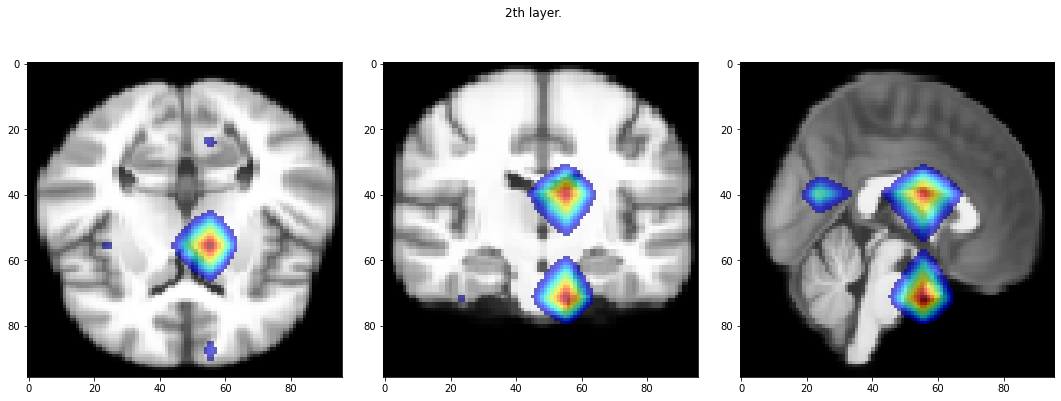

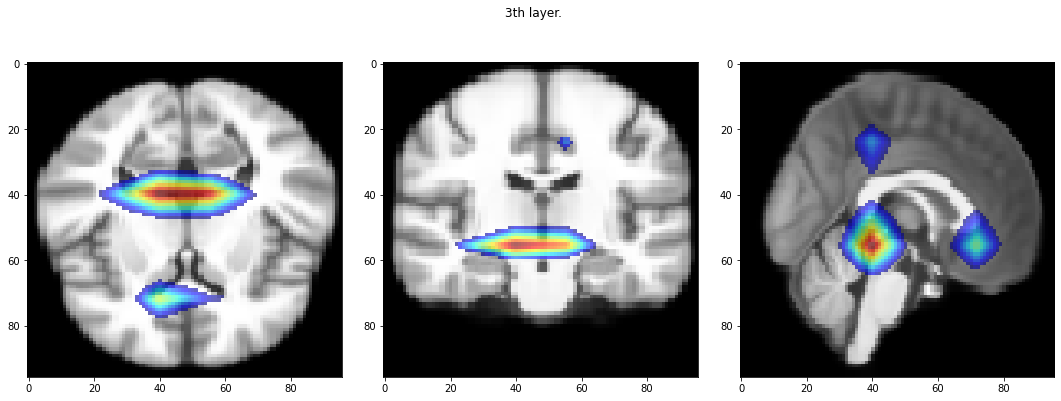

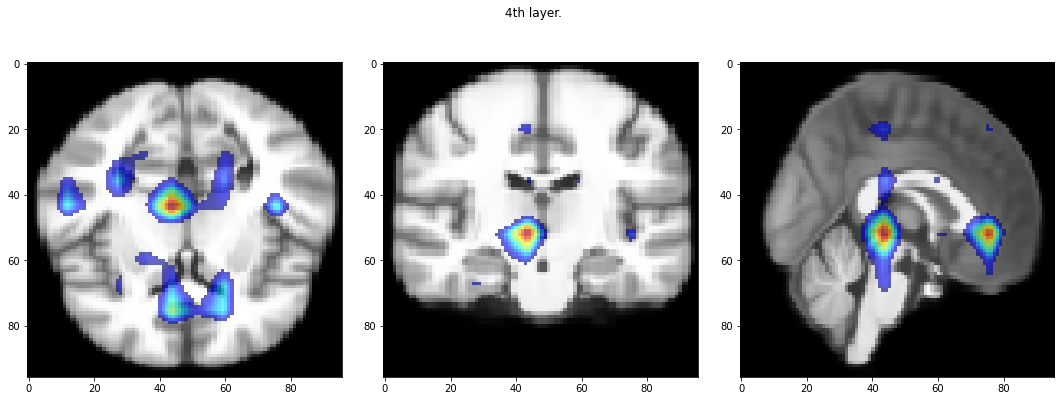

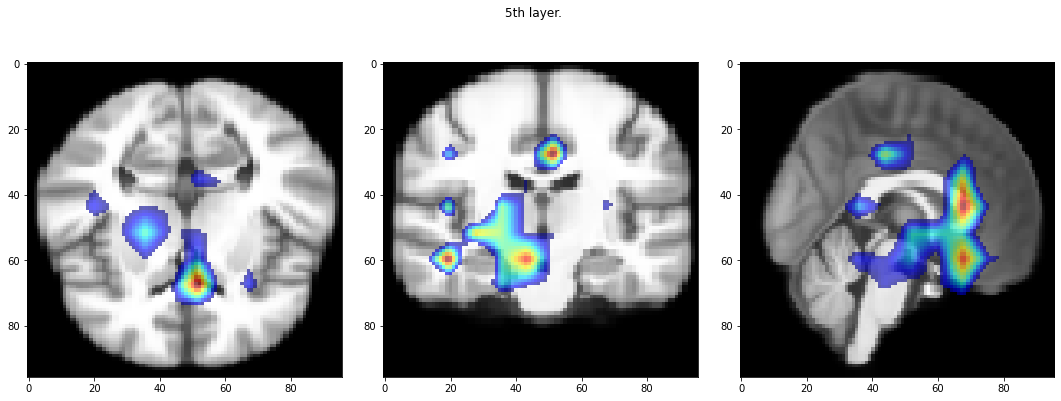

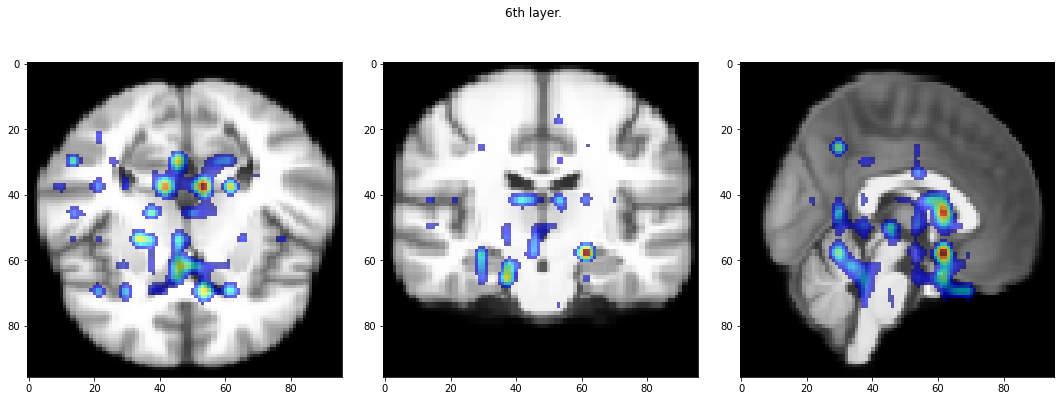

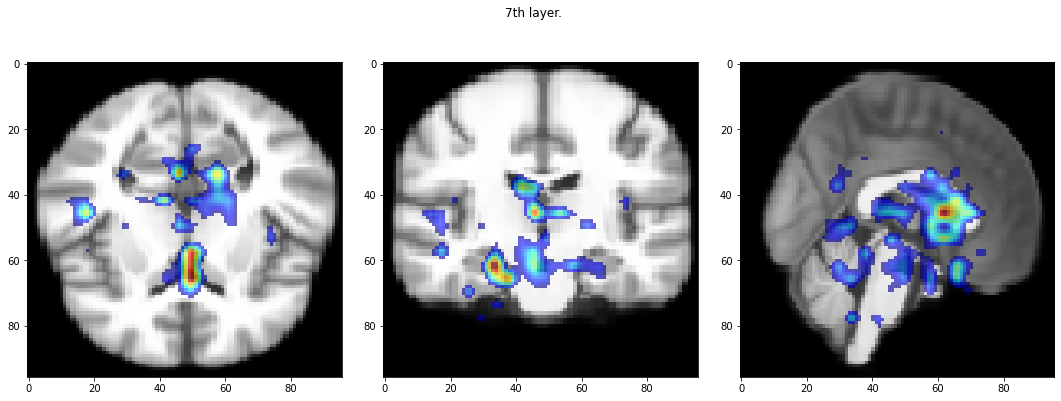

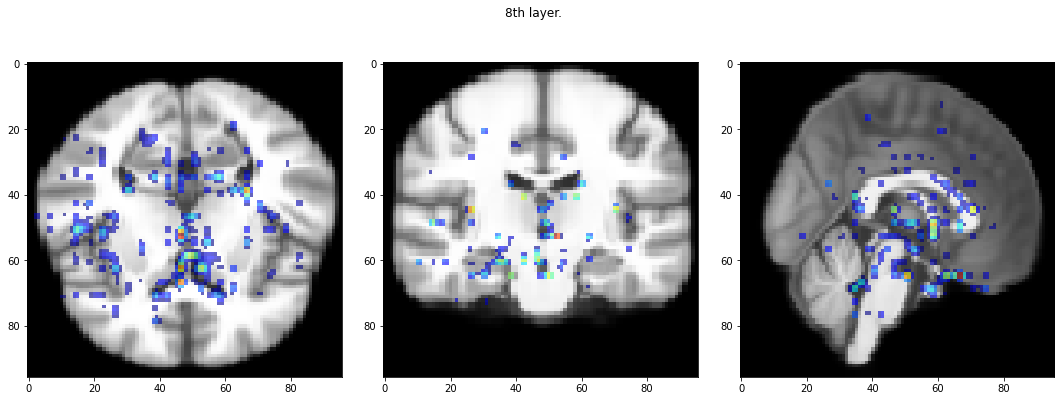

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 71.858
[true] 51 [pred] 54.982
[true] 66 [pred] 68.323
[true] 84 [pred] 88.357
[true] 72 [pred] 75.356
[true] 83 [pred] 86.500
[true] 53 [pred] 57.888
[true] 31 [pred] 30.630
[true] 70 [pred] 74.189
[true] 73 [pred] 76.110
[true] 23 [pred] 25.442
[true] 71 [pred] 60.713
[true] 81 [pred] 81.326
[true] 65 [pred] 70.397
[true] 71 [pred] 72.322
[true] 80 [pred] 80.858
[true] 22 [pred] 23.140
[true] 27 [pred] 23.909
[true] 65 [pred] 64.496
[true] 56 [pred] 60.704
[true] 58 [pred] 66.047
[true] 50 [pred] 60.081
[true] 61 [pred] 57.514
[true] 73 [pred] 67.119
[true] 53 [pred] 59.284
[true] 26 [pred] 26.612
[true] 69 [pred] 73.562
[true] 76 [pred] 79.722
[true] 67 [pred] 66.578
[true] 34 [pred] 51.071
[true] 75 [pred] 81.744
[true] 21 [pred] 22.392
[true] 75 [pred] 76.377
[true] 70 [pred] 72.686
[true] 46 [pred] 45.495
[true] 23 [pred] 24.593
[true] 72 [pred] 70.511
[true] 48 [pred] 54.393
[true] 68 [pred] 75.100
[true]

C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


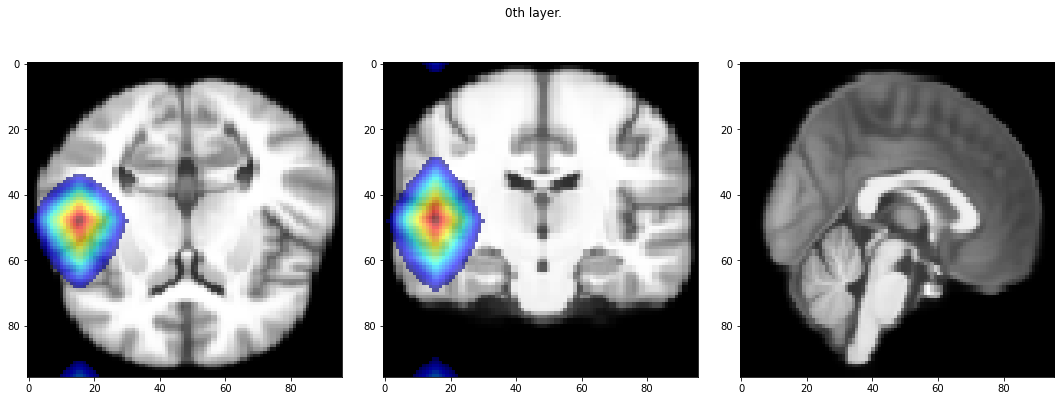

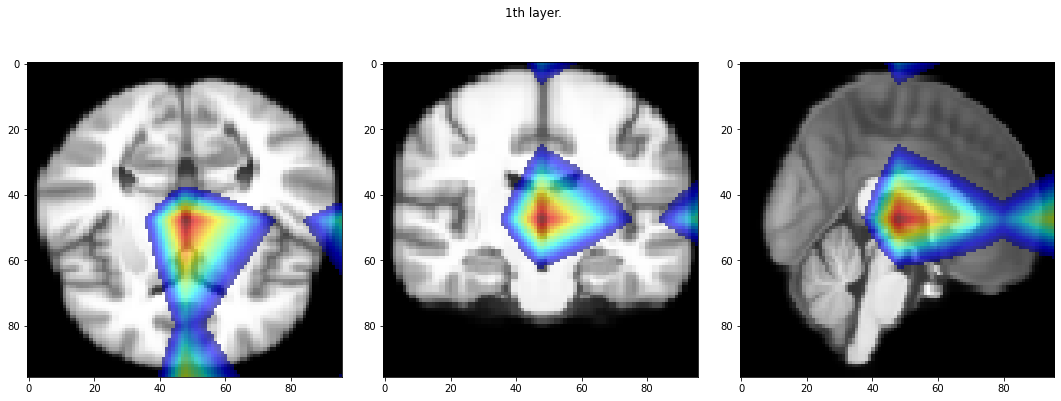

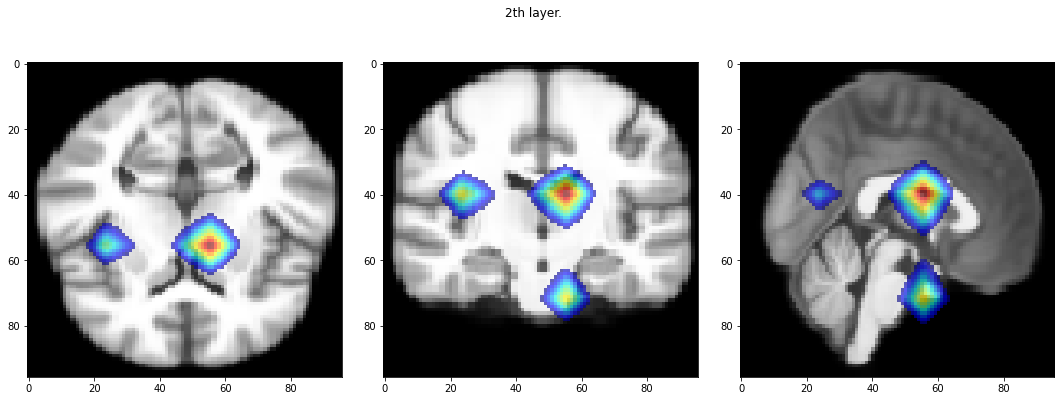

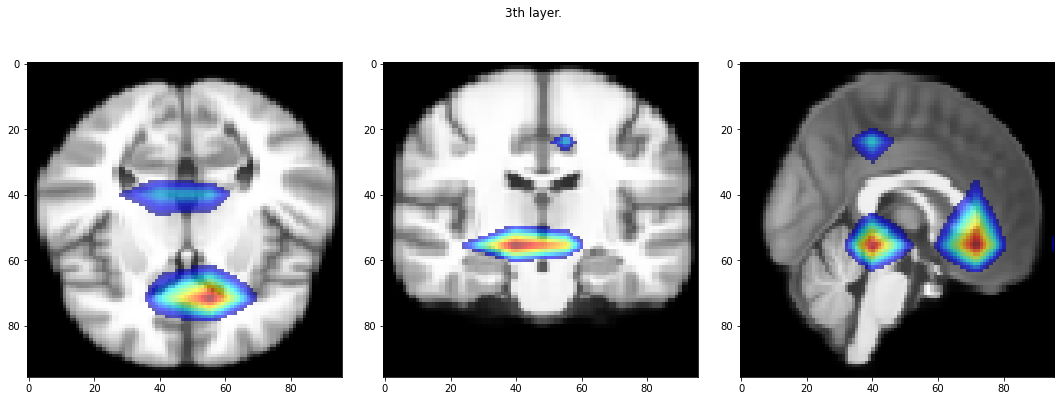

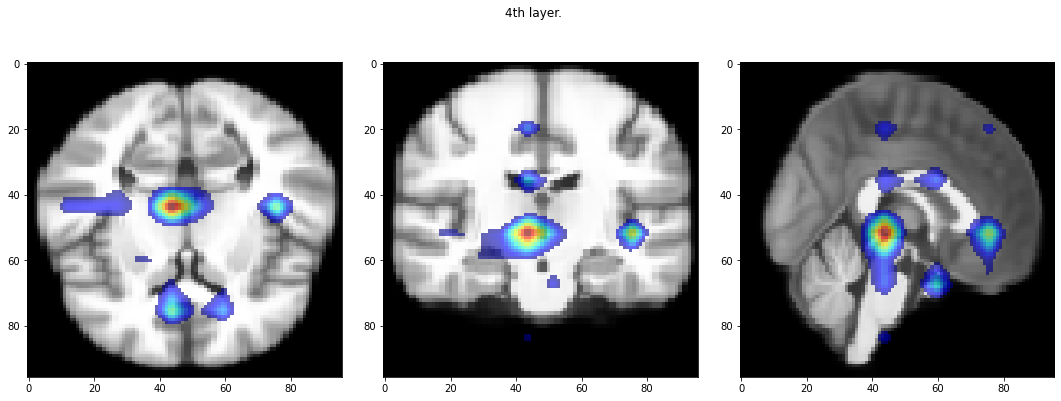

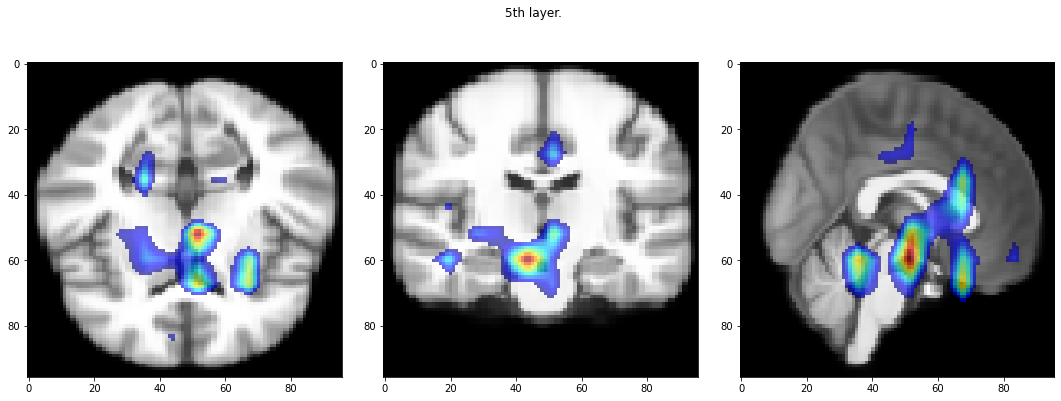

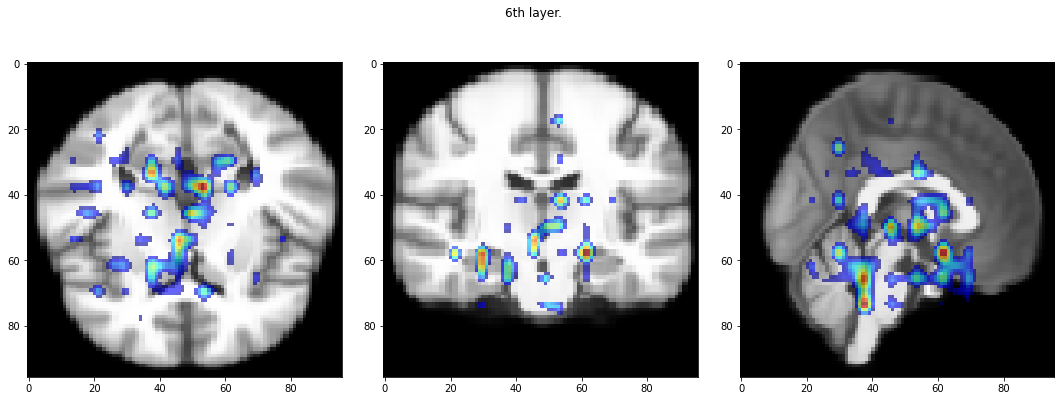

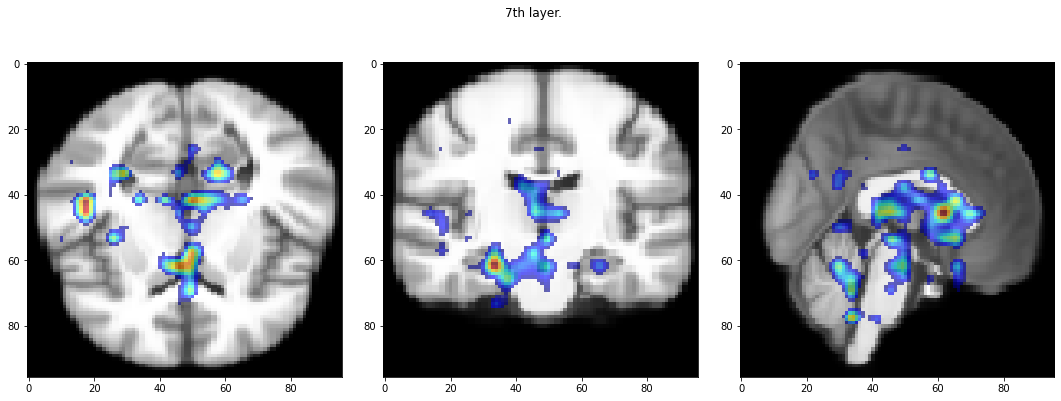

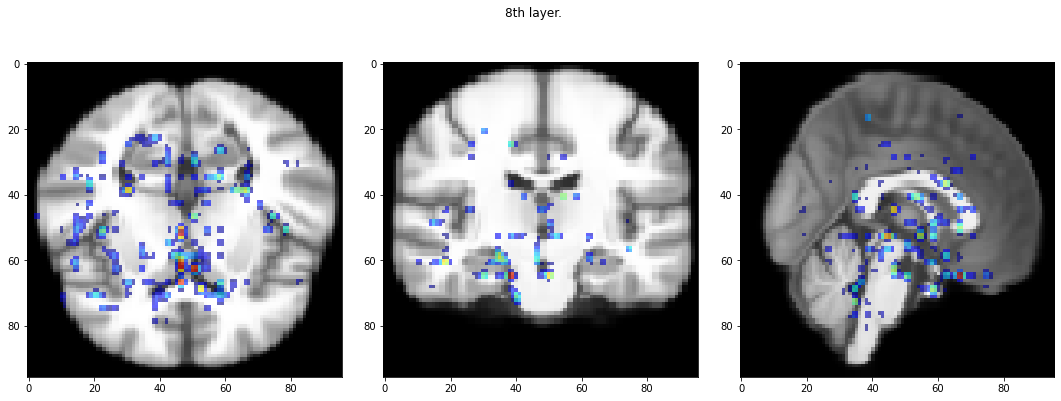

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 0.804
[true] 51 [pred] 1.075
[true] 66 [pred] 0.771
[true] 84 [pred] 1.702
[true] 72 [pred] 1.042
[true] 83 [pred] 0.675
[true] 53 [pred] 1.107
[true] 31 [pred] 0.750
[true] 70 [pred] 1.038
[true] 73 [pred] 1.412
[true] 23 [pred] 0.425
[true] 71 [pred] 0.619
[true] 81 [pred] 1.972
[true] 65 [pred] 1.167
[true] 71 [pred] 1.057
[true] 80 [pred] 1.765
[true] 22 [pred] 0.657
[true] 27 [pred] 0.688
[true] 65 [pred] 0.866
[true] 56 [pred] 1.039
[true] 58 [pred] 1.193
[true] 50 [pred] 1.242
[true] 61 [pred] 0.962
[true] 73 [pred] 0.465
[true] 53 [pred] 1.395
[true] 26 [pred] 0.637
[true] 69 [pred] 0.931
[true] 76 [pred] 1.350
[true] 67 [pred] 1.245
[true] 34 [pred] 1.278
[true] 75 [pred] 0.491
[true] 21 [pred] 0.657
[true] 75 [pred] 1.773
[true] 70 [pred] 1.384
[true] 46 [pred] 0.729
[true] 23 [pred] 1.085
[true] 72 [pred] 1.020
[true] 48 [pred] 0.605
[true] 68 [pred] 1.202
[true] 34 [pred] 1.272
[true] 47 [pred] 0.892

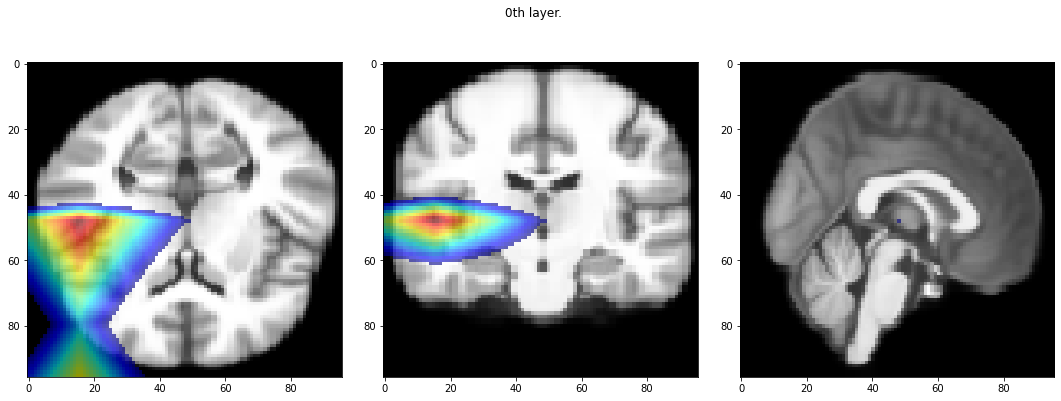

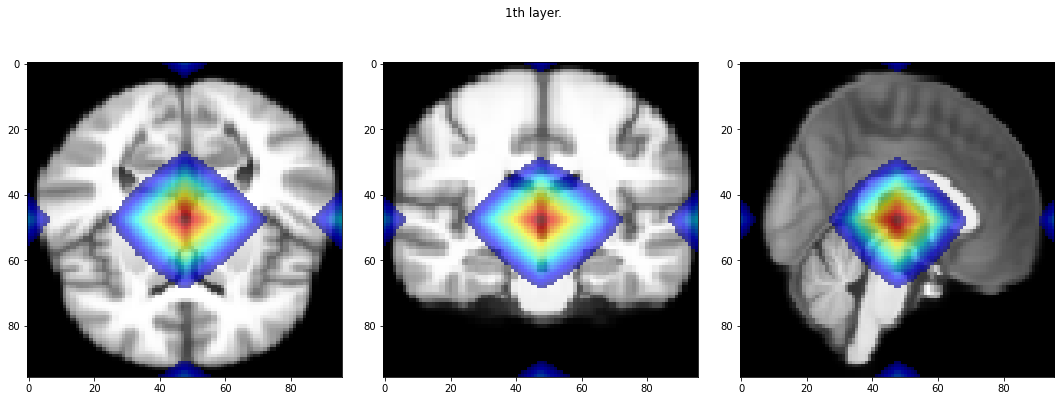

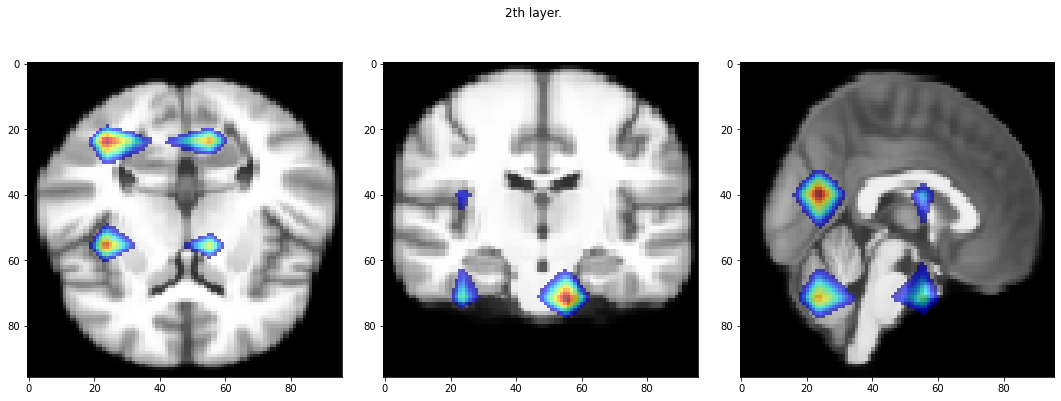

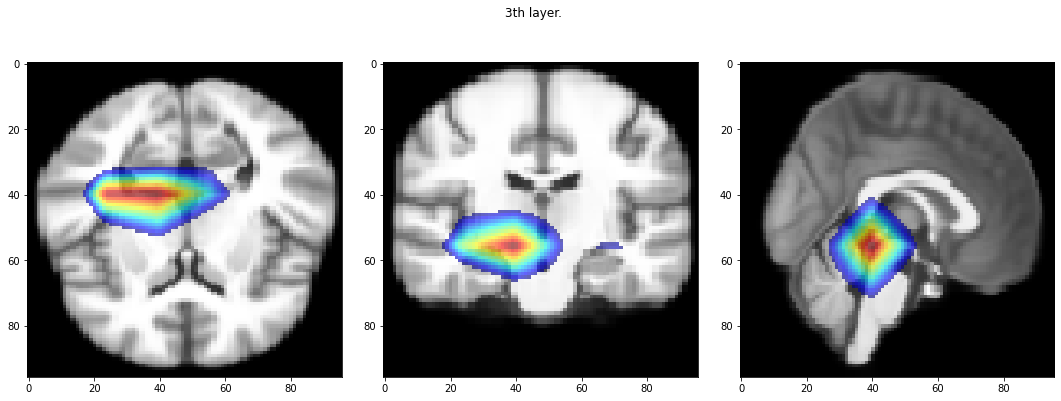

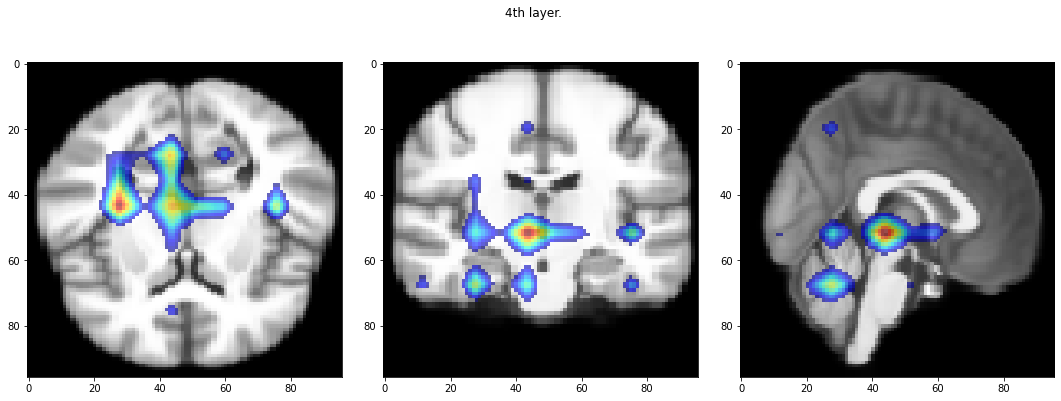

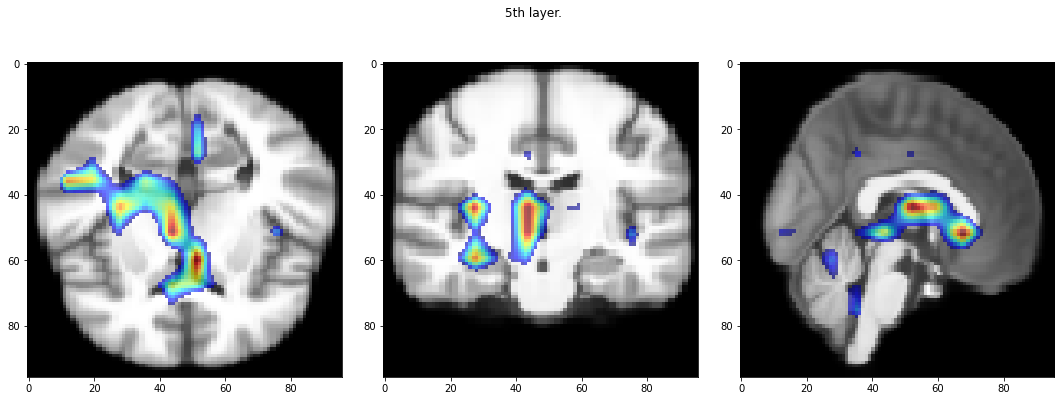

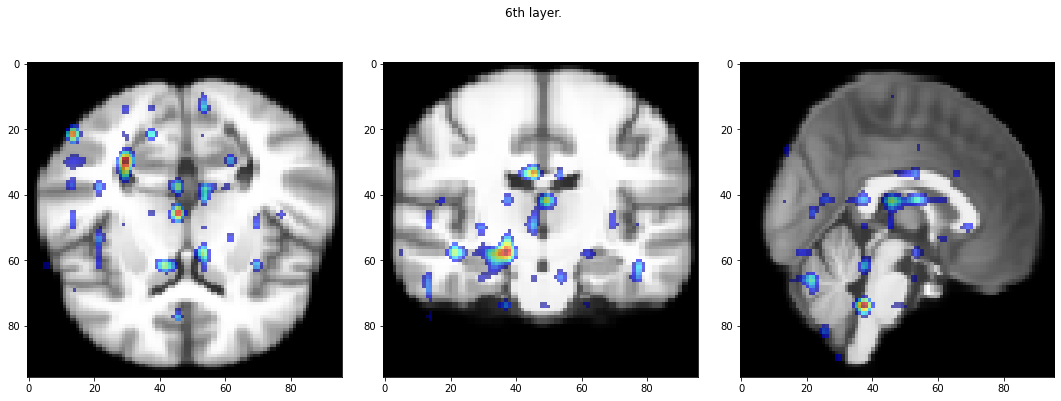

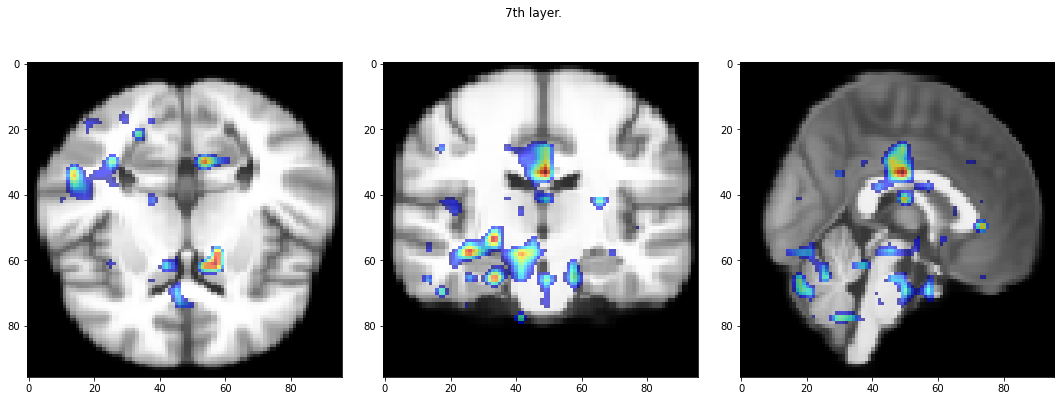

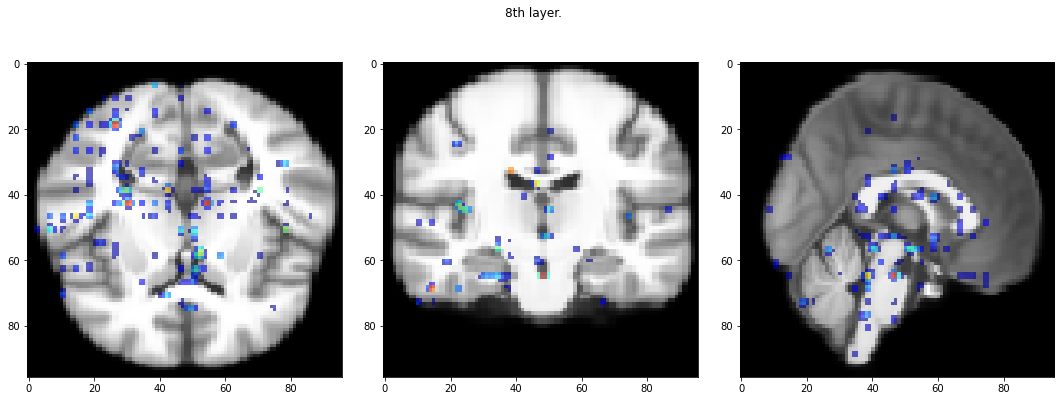

Weights successfully loaded!
Weights successfully loaded!
[true] 69 [pred] 2.954
[true] 51 [pred] 2.009
[true] 66 [pred] 2.060
[true] 84 [pred] 2.905
[true] 72 [pred] 1.843
[true] 83 [pred] 1.815
[true] 53 [pred] 2.103
[true] 31 [pred] 1.656
[true] 70 [pred] 2.397
[true] 73 [pred] 1.917
[true] 23 [pred] 1.958
[true] 71 [pred] 1.362
[true] 81 [pred] 3.134
[true] 65 [pred] 1.920
[true] 71 [pred] 2.501
[true] 80 [pred] 2.853
[true] 22 [pred] 1.683
[true] 27 [pred] 1.602
[true] 65 [pred] 1.754
[true] 56 [pred] 2.509
[true] 58 [pred] 1.906
[true] 50 [pred] 1.714
[true] 61 [pred] 1.372
[true] 73 [pred] 2.150
[true] 53 [pred] 2.603
[true] 26 [pred] 1.761
[true] 69 [pred] 3.007
[true] 76 [pred] 1.950
[true] 67 [pred] 2.146
[true] 34 [pred] 1.570
[true] 75 [pred] 1.965
[true] 21 [pred] 1.688
[true] 75 [pred] 3.585
[true] 70 [pred] 3.306
[true] 46 [pred] 1.241
[true] 23 [pred] 1.711
[true] 72 [pred] 2.906
[true] 48 [pred] 1.786
[true] 68 [pred] 2.246
[true] 34 [pred] 1.623
[true] 47 [pred] 1.482

In [ ]:
vismap = gcam(dataloader=valid_dataloader, prefix=PREFIX, visualize=True, save=True)

In [17]:
import numpy as np
vismap = np.load('G:/My Drive/brain_data/workspace/result/models/20210830-1707_resnet/layers/layer0\\weightep000_mae53.66_layer0.npy')

In [13]:
from sage.visualization.visual_utils import plot_vismap, check_type

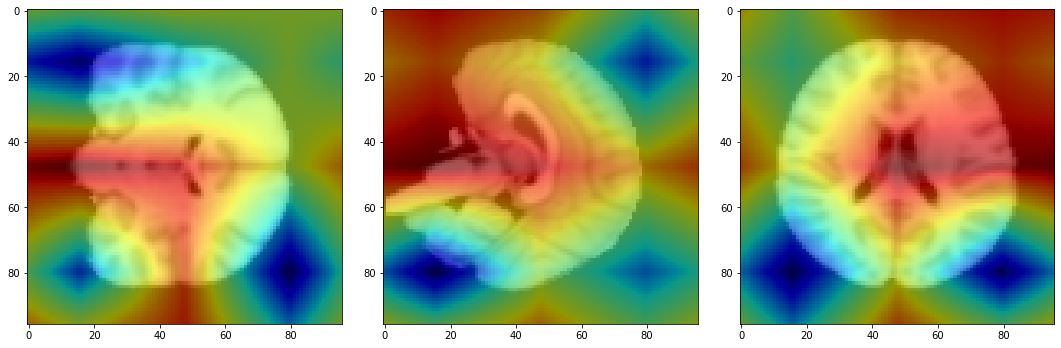

In [24]:
plot_vismap('template', vvv, masked=False)

In [19]:
threshold = 2
vismap = np.ma.masked_where(vismap < threshold, vismap)

In [ ]:
with imageio.get_writer(f'./result/gifs/{gif_path}', mode='I') as writer:
    for files in sorted(glob('./result/att_tmp_plots/*.png')):
        image = imageio.imread(files)
        writer.append_data(image)

## Captum

In [8]:
from captum.attr import IntegratedGradients, GuidedGradCam

In [9]:
gcam = VisTool(cfg, model, cam_type='gcam')
gcam.load_weight(weight)

Weights successfully loaded!
Weights successfully loaded!


In [10]:
model = gcam.model

In [11]:
x, y = map(lambda x: x.to('cuda'), [x, y])

In [12]:
guided_gc = GuidedGradCam(model, model.encoder.layer1[0].conv1)
attribution = guided_gc.attribute(x)

C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\captum\_utils\gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\captum\attr\_core\guided_backprop_deconvnet.py:60: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


In [13]:
vmap = attribution.detach().cpu().data.numpy()

In [14]:
import pandas as pd
pd.Series(vmap.reshape(-1)).quantile(.97)

1.1488258770953002e-07